In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Load data dari file Excel

# Green, jarak 4cm, 5 Sampel data
dfG41 = pd.read_excel('green80.xlsx', usecols=['t', 'G41']) # Green Jarak 4 cm sampel 1
dfG42 = pd.read_excel('green80.xlsx', usecols=['t', 'G42']) # Green Jarak 4 cm sampel 2
dfG43 = pd.read_excel('green80.xlsx', usecols=['t', 'G43']) # Green Jarak 4 cm sampel 3
dfG44 = pd.read_excel('green80.xlsx', usecols=['t', 'G44']) # Green Jarak 4 cm sampel 4
dfG45 = pd.read_excel('green80.xlsx', usecols=['t', 'G45']) # Green Jarak 4 cm sampel 5

# Green, jarak 3cm, 5 Sampel data
dfG31 = pd.read_excel('green80.xlsx', usecols=['t', 'G31']) # Green Jarak 3 cm sampel 1
dfG32 = pd.read_excel('green80.xlsx', usecols=['t', 'G32']) # Green Jarak 3 cm sampel 2
dfG33 = pd.read_excel('green80.xlsx', usecols=['t', 'G33']) # Green Jarak 3 cm sampel 3
dfG34 = pd.read_excel('green80.xlsx', usecols=['t', 'G34']) # Green Jarak 3 cm sampel 4
dfG35 = pd.read_excel('green80.xlsx', usecols=['t', 'G35']) # Green Jarak 3 cm sampel 5

# Extract data dari kolom masing-masing sampel
time = dfG41['t'].to_numpy()
G41_signal_data = dfG41['G41'].to_numpy()
G42_signal_data = dfG42['G42'].to_numpy()
G43_signal_data = dfG43['G43'].to_numpy()
G44_signal_data = dfG44['G44'].to_numpy()
G45_signal_data = dfG45['G45'].to_numpy()

time = dfG41['t'].to_numpy()
G31_signal_data = dfG31['G31'].to_numpy()
G32_signal_data = dfG32['G32'].to_numpy()
G33_signal_data = dfG33['G33'].to_numpy()
G34_signal_data = dfG34['G34'].to_numpy()
G35_signal_data = dfG35['G35'].to_numpy()

# Green 80% Jarak 4 cm

## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 4 cm

In [3]:
# G41 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G41_filtered_signal = signal.filtfilt(b, a, G41_signal_data)

# Rectify the signal (take only the positive values)
G41_rectified_signal = np.abs(G41_filtered_signal)

In [4]:
# G42 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G42_filtered_signal = signal.filtfilt(b, a, G42_signal_data)

# Rectify the signal (take only the positive values)
G42_rectified_signal = np.abs(G42_filtered_signal)

In [5]:
# G43 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G43_filtered_signal = signal.filtfilt(b, a, G43_signal_data)

# Rectify the signal (take only the positive values)
G43_rectified_signal = np.abs(G43_filtered_signal)

In [6]:
# G44 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G44_filtered_signal = signal.filtfilt(b, a, G44_signal_data)

# Rectify the signal (take only the positive values)
G44_rectified_signal = np.abs(G44_filtered_signal)

In [7]:
# G45 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G45_filtered_signal = signal.filtfilt(b, a, G45_signal_data)

# Rectify the signal (take only the positive values)
G45_rectified_signal = np.abs(G45_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [8]:
# G41
# Perform Fourier transform
G41_signal_fft = np.fft.fft(G41_filtered_signal)
G41_signal_freq = np.fft.fftfreq(len(G41_filtered_signal), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
G41_n = len(G41_filtered_signal)
G41_freq = G41_signal_freq[0:int(G41_n/2)]
G41_fft_amp = np.abs(G41_signal_fft)[0:int(G41_n/2)]/G41_n*2

# Perform power spectral density (PSD) calculation
G41_psd = (1/(fs*G41_n)) * np.square(np.abs(G41_signal_fft[:G41_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G41_freq_psd = G41_signal_freq[0:int(G41_n/2)]
G41_psd_one_sided = G41_psd[0:int(G41_n/2)]

In [9]:
# G42
# Perform Fourier Transform
G42_signal_fft = np.fft.fft(G42_filtered_signal)
G42_signal_freq = np.fft.fftfreq(len(G42_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G42_n = len(G42_filtered_signal)
G42_freq = G42_signal_freq[0:int(G42_n/2)]
G42_fft_amp = np.abs(G42_signal_fft)[0:int(G42_n/2)]/G42_n*2

# Perform power spectral density (PSD) calculation
G42_psd = (1/(fs*G41_n)) * np.square(np.abs(G42_signal_fft[:G42_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G42_freq_psd = G42_signal_freq[0:int(G42_n/2)]
G42_psd_one_sided = G42_psd[0:int(G42_n/2)]

In [10]:
# G43
# Perform Fourier Transform
G43_signal_fft = np.fft.fft(G43_filtered_signal)
G43_signal_freq = np.fft.fftfreq(len(G43_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G43_n = len(G43_filtered_signal)
G43_freq = G43_signal_freq[0:int(G43_n/2)]
G43_fft_amp = np.abs(G43_signal_fft)[0:int(G43_n/2)]/G43_n*2

# Perform power spectral density (PSD) calculation
G43_psd = (1/(fs*G43_n)) * np.square(np.abs(G43_signal_fft[:G43_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G43_freq_psd = G43_signal_freq[0:int(G43_n/2)]
G43_psd_one_sided = G43_psd[0:int(G43_n/2)]

In [11]:
# G44
# Perform Fourier Transform
G44_signal_fft = np.fft.fft(G44_filtered_signal)
G44_signal_freq = np.fft.fftfreq(len(G44_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G44_n = len(G43_filtered_signal)
G44_freq = G44_signal_freq[0:int(G44_n/2)]
# G44_fft_amp - np.abs(G42_signal_fft)[0:int(G44_n/2)]/G44_n*2
G44_fft_amp = np.abs(G44_signal_fft)[0:int(G44_n/2)]/G44_n*2

# Perform power spectral density (PSD) calculation
G44_psd = (1/(fs*G44_n)) * np.square(np.abs(G44_signal_fft[:G44_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G44_freq_psd = G44_signal_freq[0:int(G44_n/2)]
G44_psd_one_sided = G44_psd[0:int(G44_n/2)]

In [12]:
# G45
# Perform Fourier Transform
G45_signal_fft = np.fft.fft(G44_filtered_signal)
G45_signal_freq = np.fft.fftfreq(len(G45_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G45_n = len(G45_filtered_signal)
G45_freq = G45_signal_freq[0:int(G45_n/2)]
G45_fft_amp = np.abs(G45_signal_fft)[0:int(G45_n/2)]/G45_n*2

# Perform power spectral density (PSD) calculation
G45_psd = (1/(fs*G44_n)) * np.square(np.abs(G45_signal_fft[:G45_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G45_freq_psd = G45_signal_freq[0:int(G45_n/2)]
G45_psd_one_sided = G45_psd[0:int(G45_n/2)]

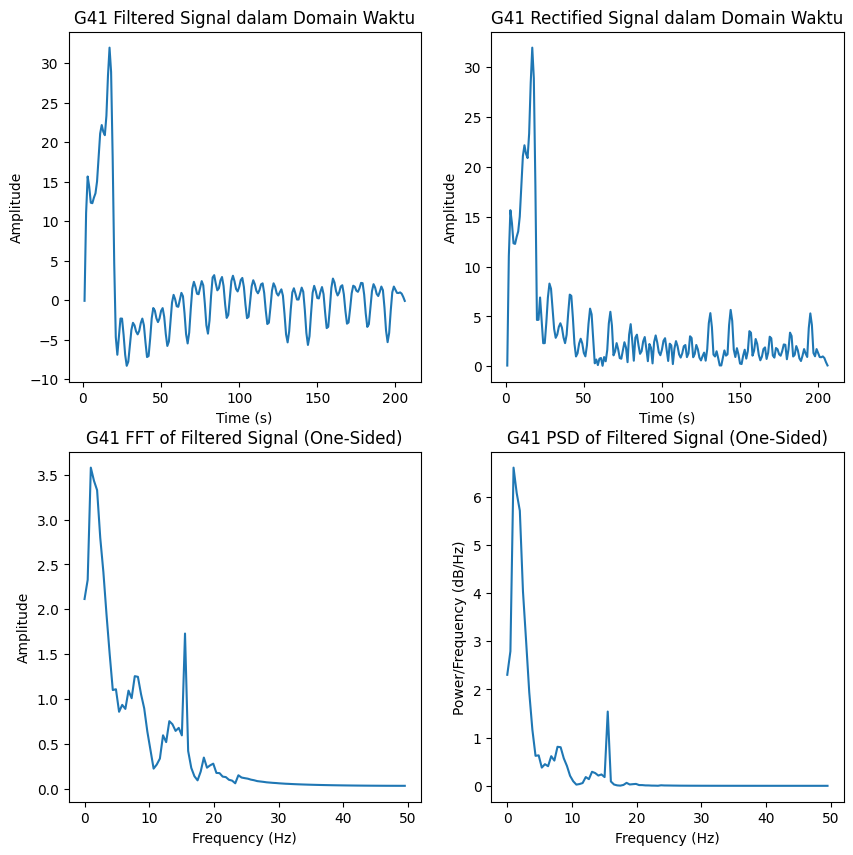

In [13]:
# G41
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G41_filtered_signal)
axs[0, 0].set_title('G41 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G41_rectified_signal)
axs[0, 1].set_title('G41 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G41_freq, G41_fft_amp)
axs[1, 0].set_title('G41 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G41_freq_psd, G41_psd_one_sided)
axs[1, 1].set_title('G41 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_4cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

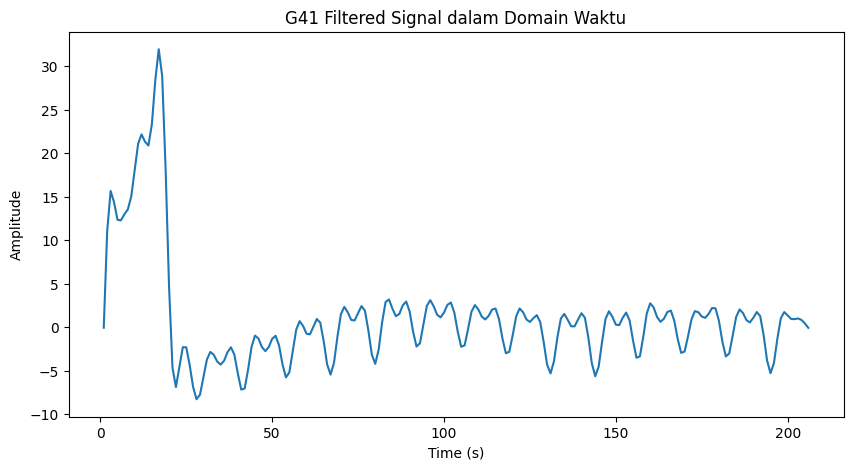

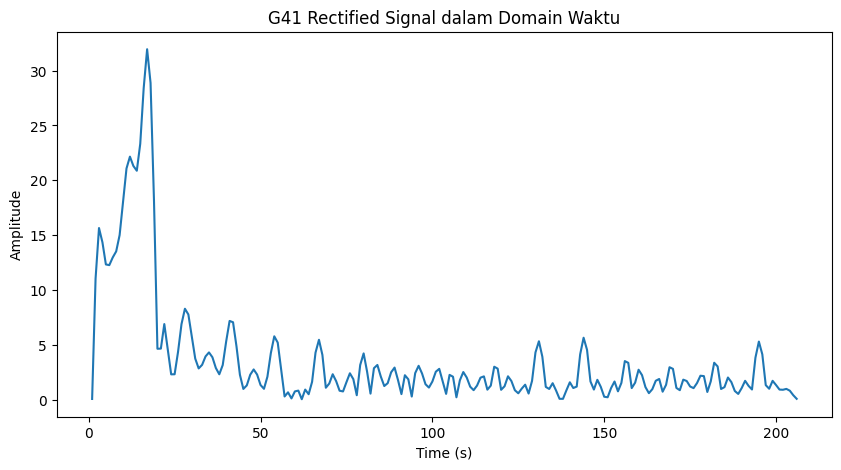

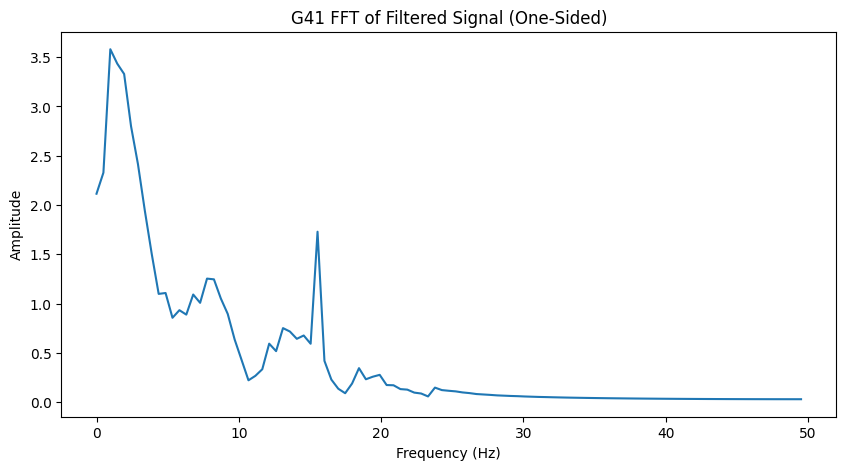

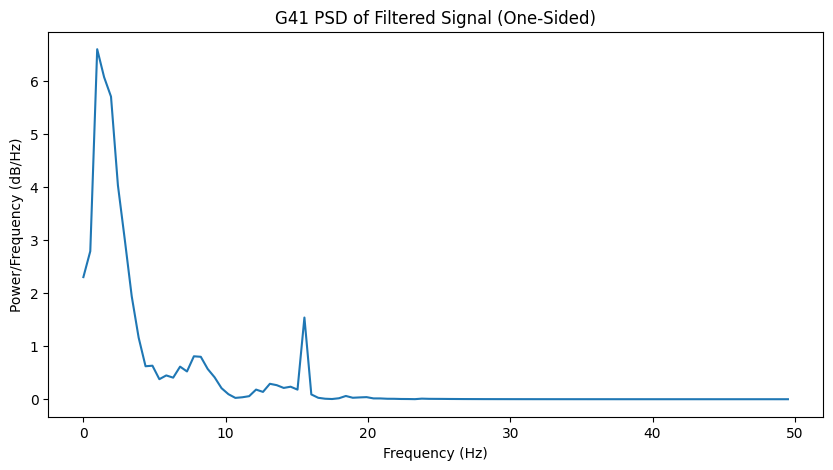

In [14]:
plt.figure(figsize=(10,5))
plt.plot(time, G41_filtered_signal)
plt.title('G41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, G41_rectified_signal)
plt.title('G41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(G41_freq, G41_fft_amp)
plt.title('G41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(G41_freq_psd, G41_psd_one_sided)
plt.title('G41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

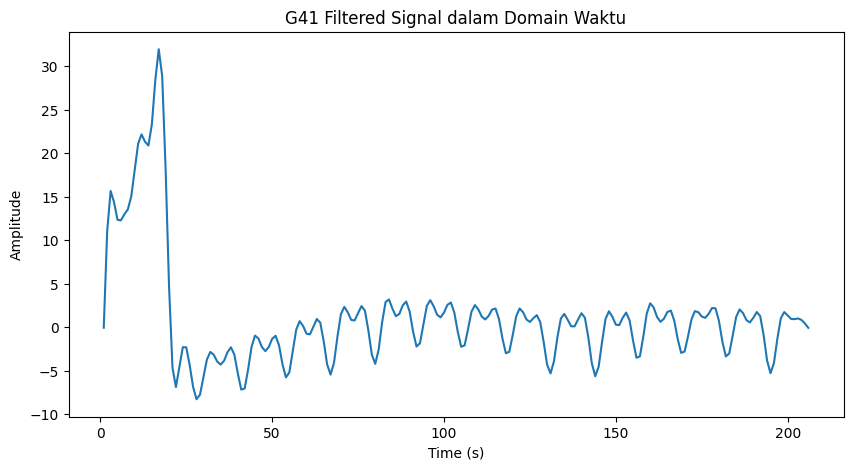

In [15]:
plt.figure(figsize=(10,5))
plt.plot(time, G41_filtered_signal)
plt.title('G41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

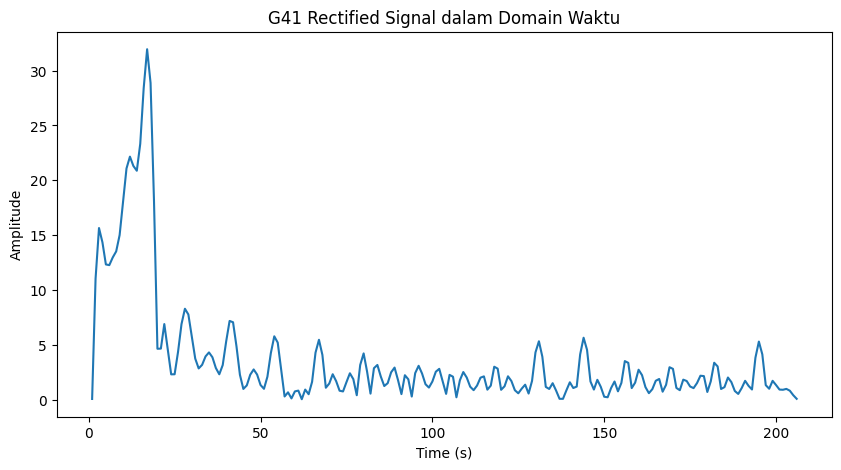

In [16]:
plt.figure(figsize=(10,5))
plt.plot(time, G41_rectified_signal)
plt.title('G41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

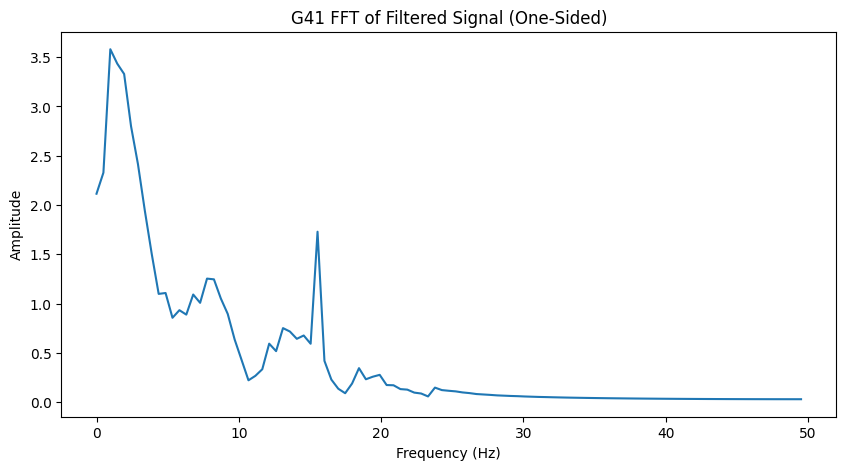

In [17]:
plt.figure(figsize=(10,5))
plt.plot(G41_freq, G41_fft_amp)
plt.title('G41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

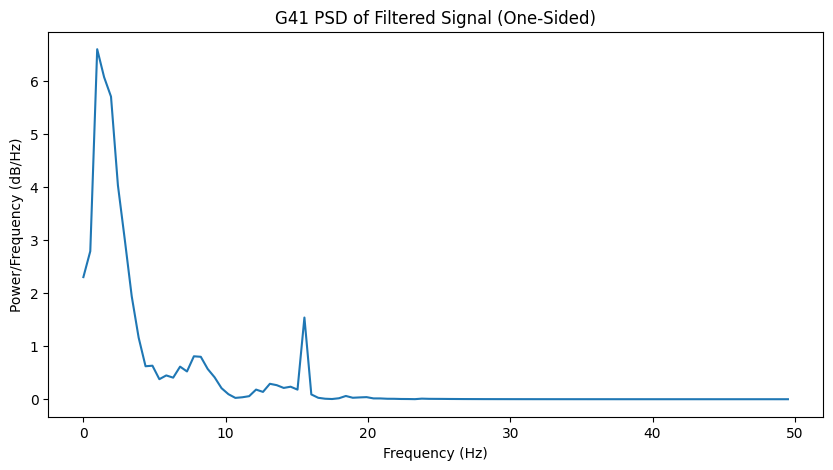

In [18]:
plt.figure(figsize=(10,5))
plt.plot(G41_freq_psd, G41_psd_one_sided)
plt.title('G41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

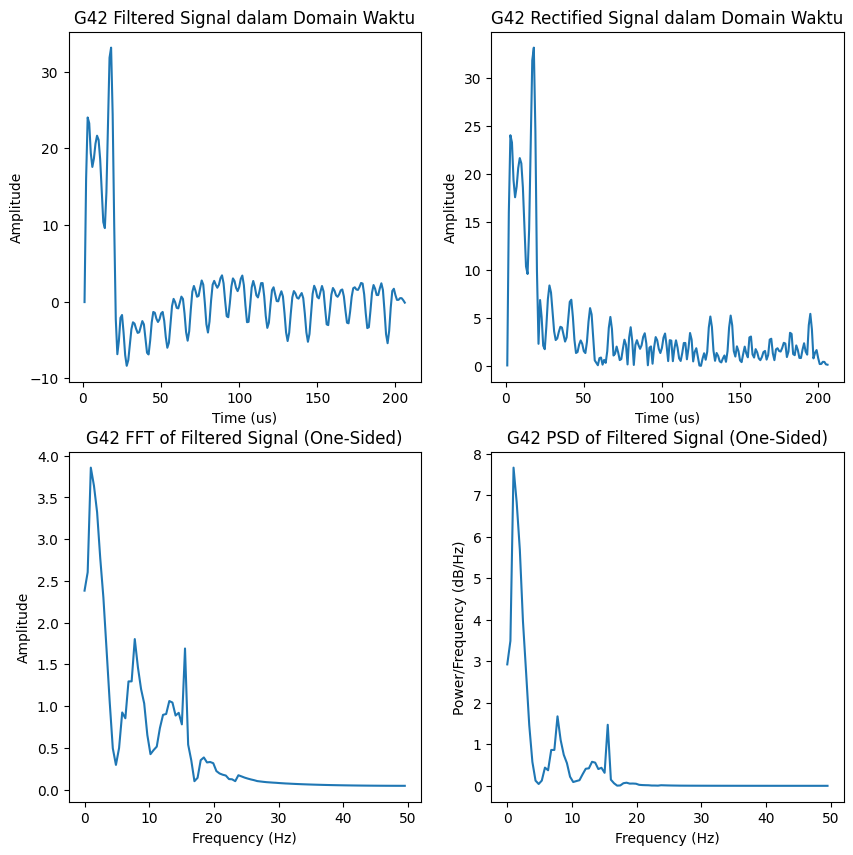

In [19]:
# G42
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G42_filtered_signal)
axs[0, 0].set_title('G42 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G42_rectified_signal)
axs[0, 1].set_title('G42 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G42_freq, G42_fft_amp)
axs[1, 0].set_title('G42 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G42_freq_psd, G42_psd_one_sided)
axs[1, 1].set_title('G42 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_4cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

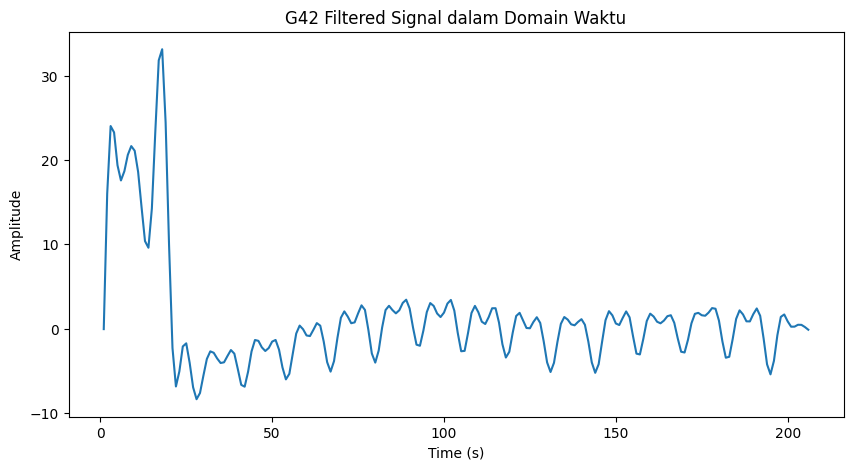

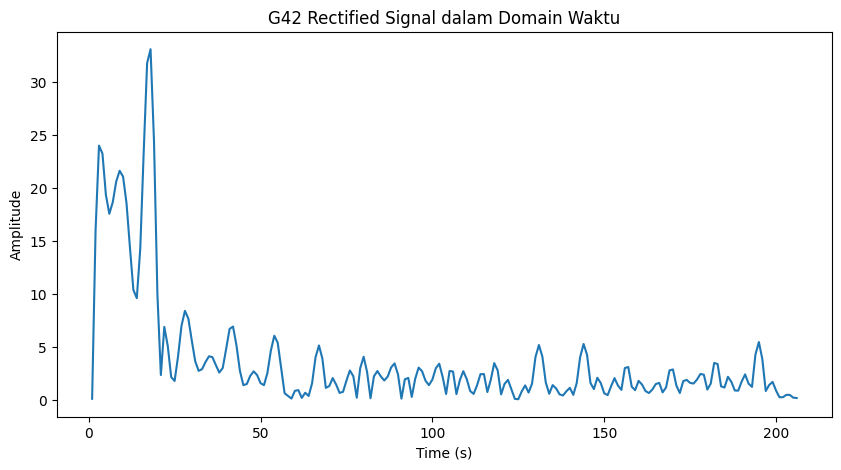

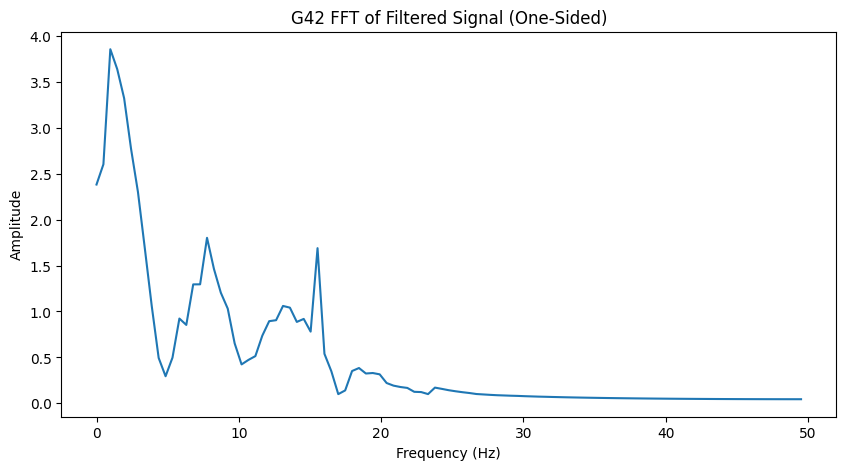

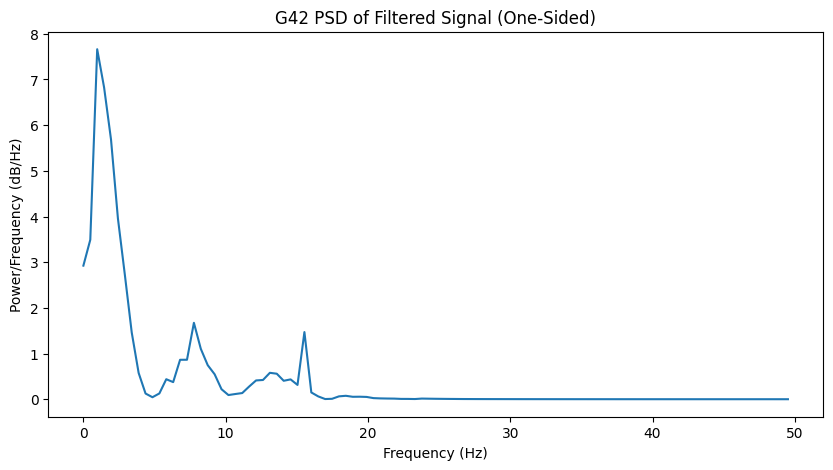

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time, G42_filtered_signal)
plt.title('G42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G42_rectified_signal)
plt.title('G42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G42_freq, G42_fft_amp)
plt.title('G42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G42_freq_psd, G42_psd_one_sided)
plt.title('G42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

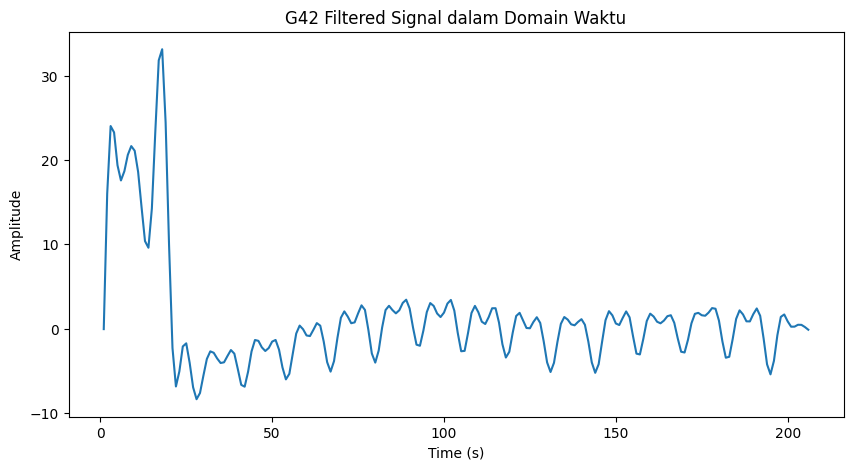

In [21]:
plt.figure(figsize=(10,5))
plt.plot(time, G42_filtered_signal)
plt.title('G42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

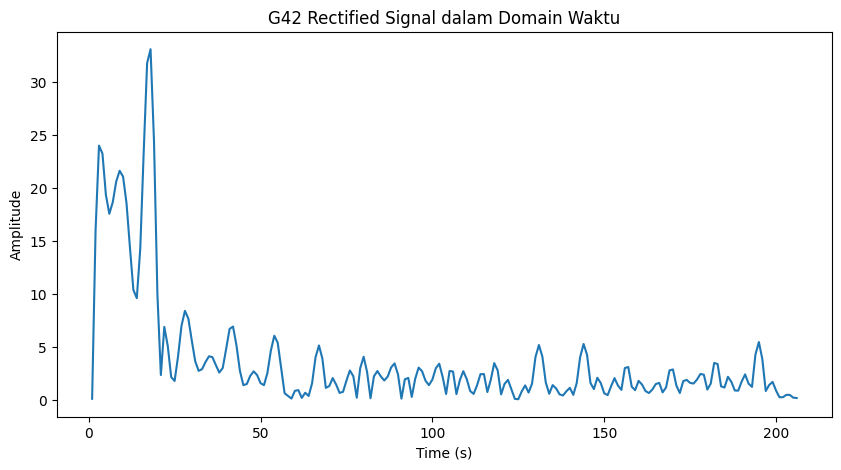

In [22]:
plt.figure(figsize=(10,5))
plt.plot(time, G42_rectified_signal)
plt.title('G42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

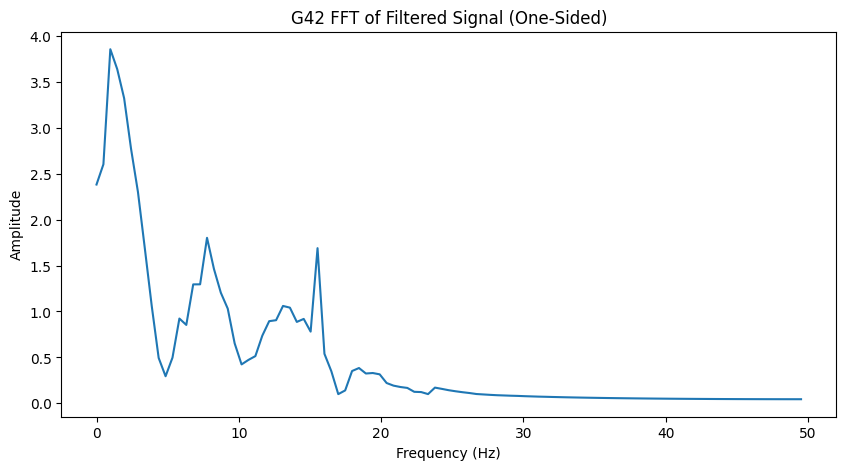

In [23]:
plt.figure(figsize=(10,5))
plt.plot(G42_freq, G42_fft_amp)
plt.title('G42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

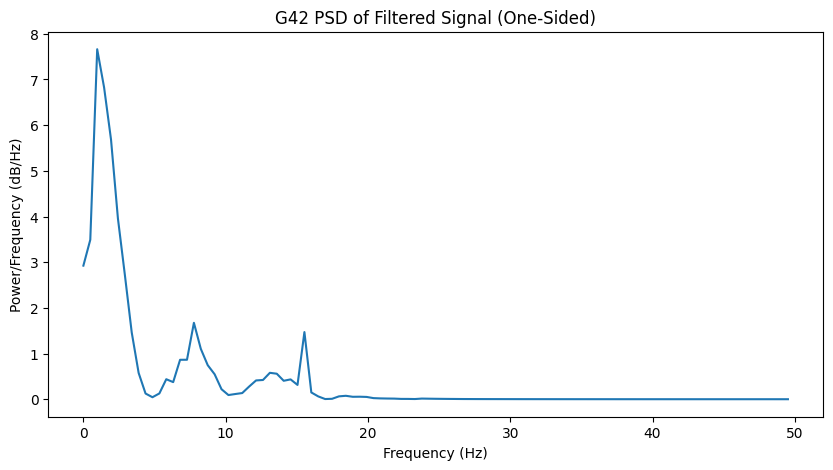

In [24]:
plt.figure(figsize=(10,5))
plt.plot(G42_freq_psd, G42_psd_one_sided)
plt.title('G42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

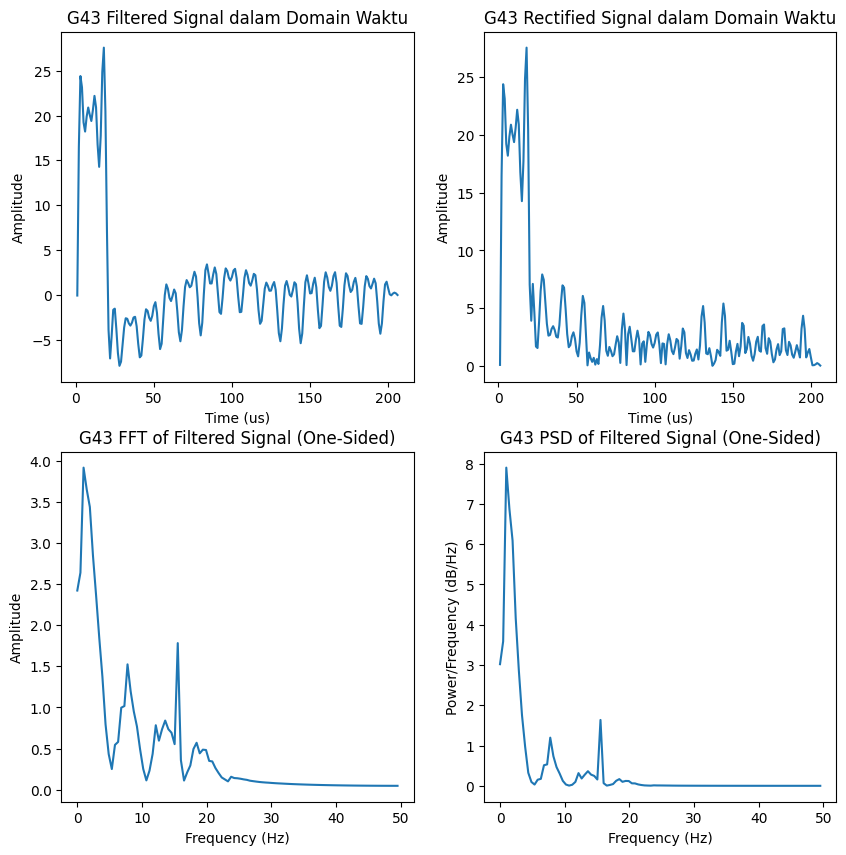

In [25]:
# G43
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G43_filtered_signal)
axs[0, 0].set_title('G43 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G43_rectified_signal)
axs[0, 1].set_title('G43 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G43_freq, G43_fft_amp)
axs[1, 0].set_title('G43 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G43_freq_psd, G43_psd_one_sided)
axs[1, 1].set_title('G43 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_4cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

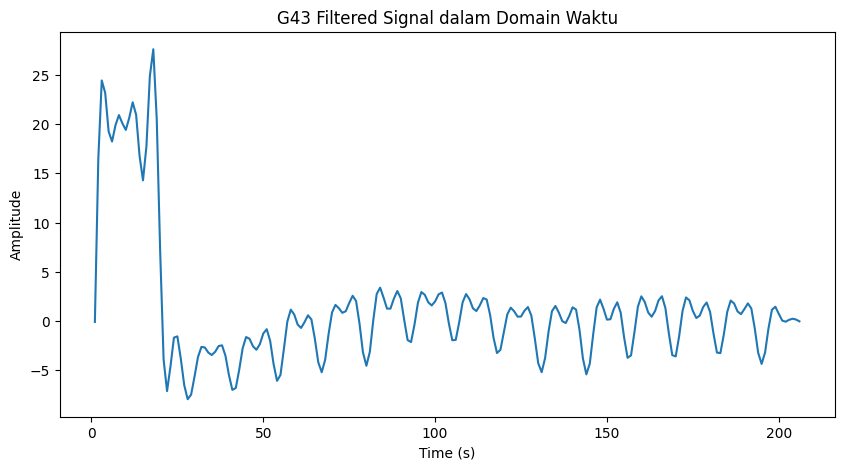

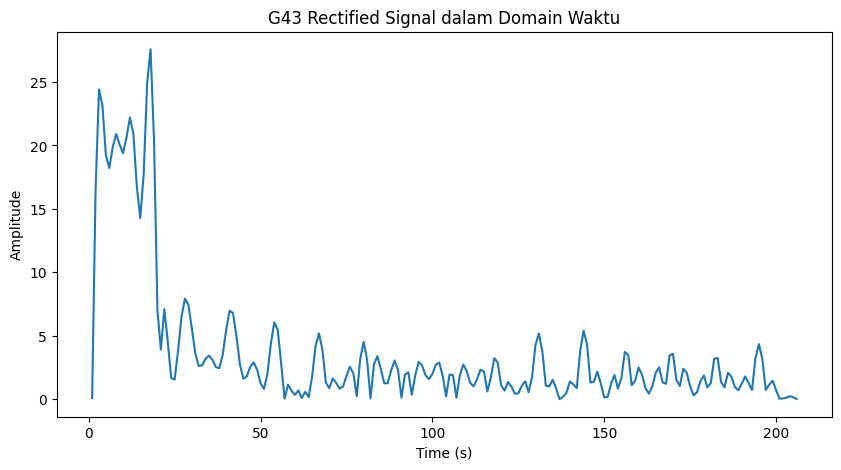

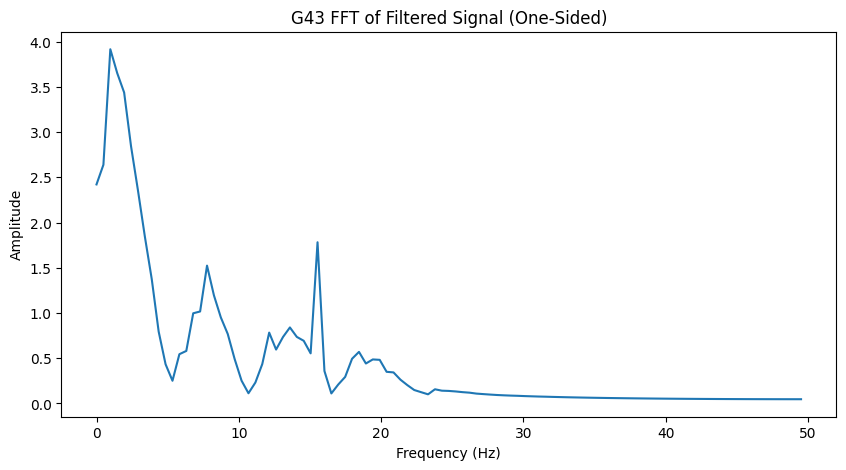

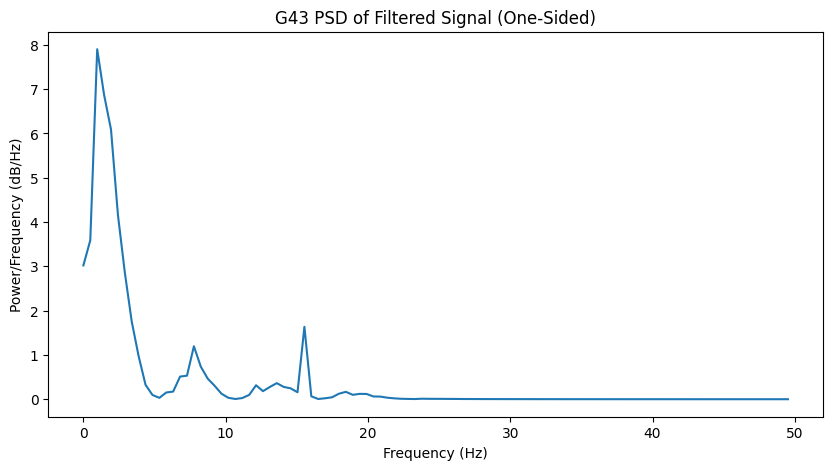

In [26]:
plt.figure(figsize=(10,5))
plt.plot(time, G43_filtered_signal)
plt.title('G43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(time, G43_rectified_signal)
plt.title('G43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(G43_freq, G43_fft_amp)
plt.title('G43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


plt.figure(figsize=(10,5))
plt.plot(G43_freq_psd, G43_psd_one_sided)
plt.title('G43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

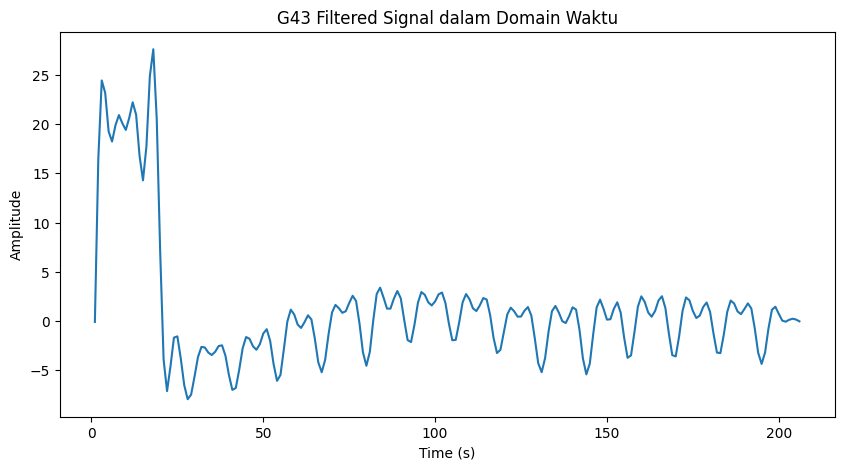

In [27]:
plt.figure(figsize=(10,5))
plt.plot(time, G43_filtered_signal)
plt.title('G43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

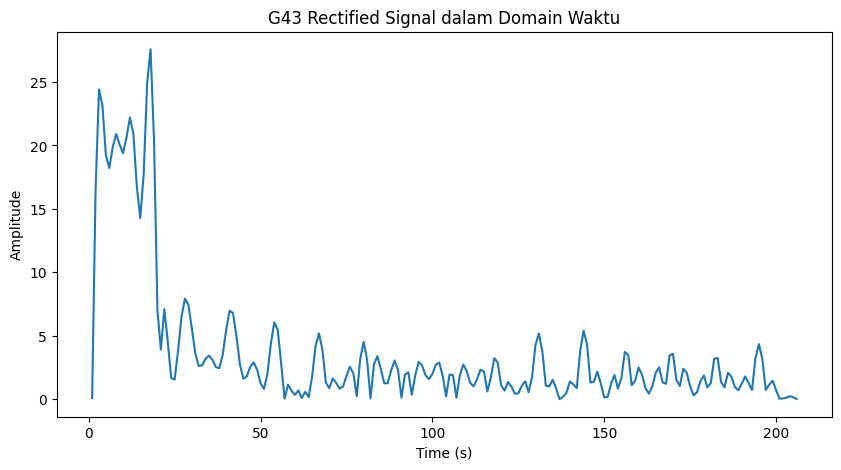

In [28]:
plt.figure(figsize=(10,5))
plt.plot(time, G43_rectified_signal)
plt.title('G43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

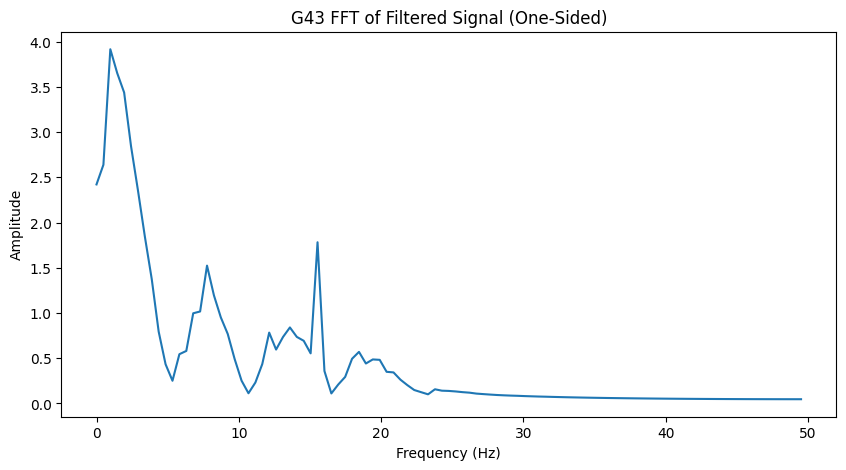

In [29]:
plt.figure(figsize=(10,5))
plt.plot(G43_freq, G43_fft_amp)
plt.title('G43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

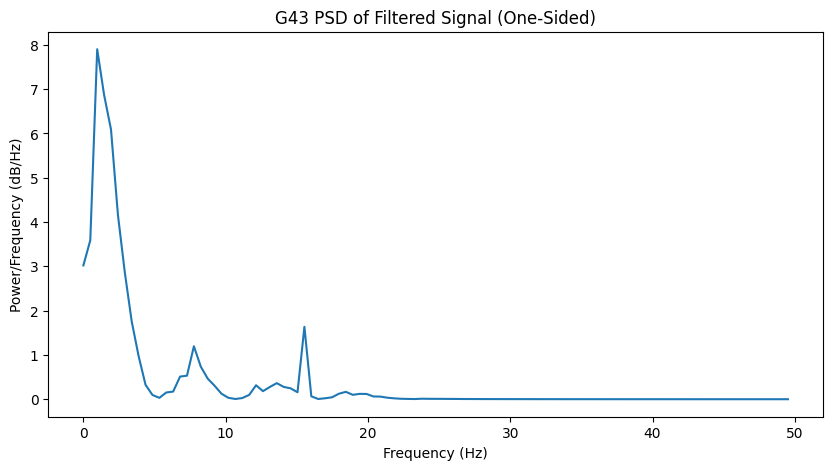

In [30]:
plt.figure(figsize=(10,5))
plt.plot(G43_freq_psd, G43_psd_one_sided)
plt.title('G43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

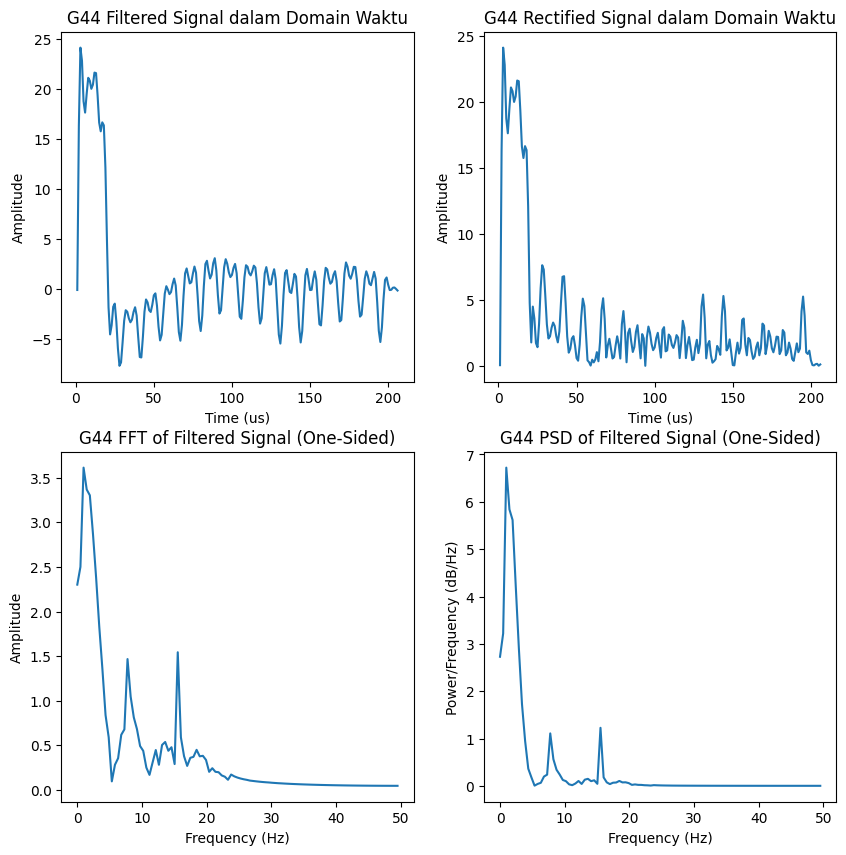

In [31]:
# G44
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G44_filtered_signal)
axs[0, 0].set_title('G44 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G44_rectified_signal)
axs[0, 1].set_title('G44 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G44_freq, G44_fft_amp)
axs[1, 0].set_title('G44 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G44_freq_psd, G44_psd_one_sided)
axs[1, 1].set_title('G44 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_4cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

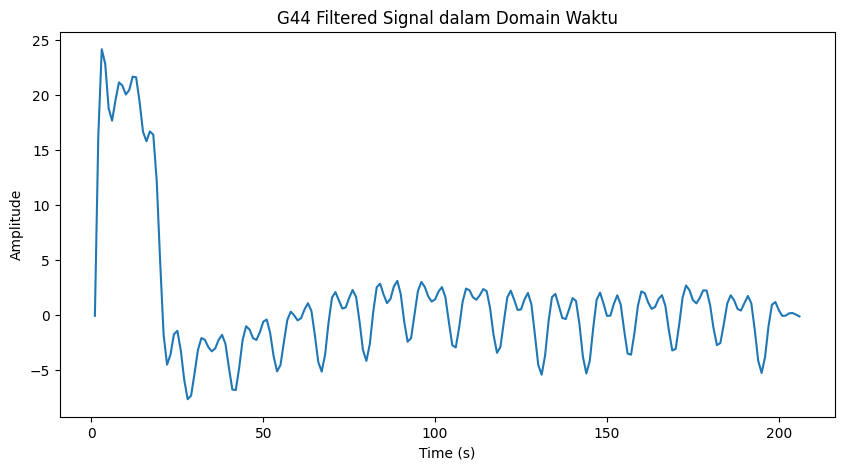

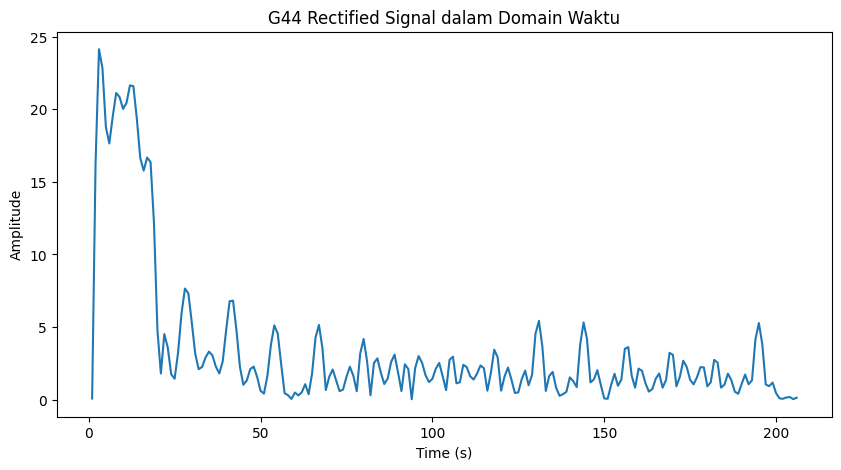

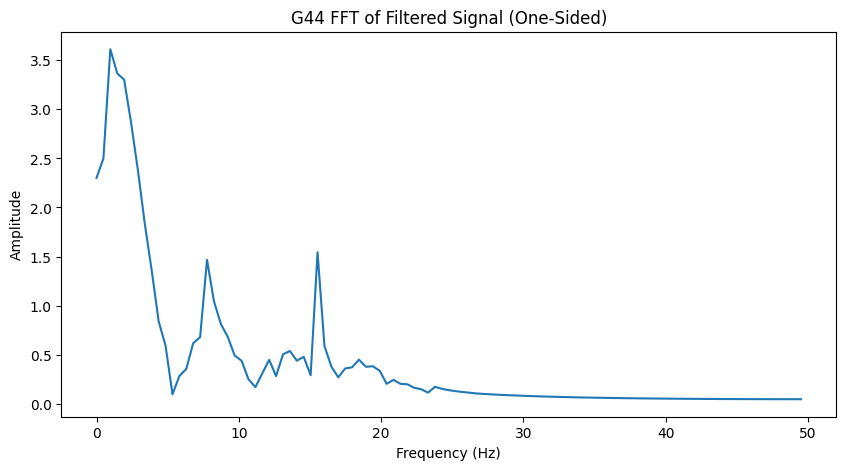

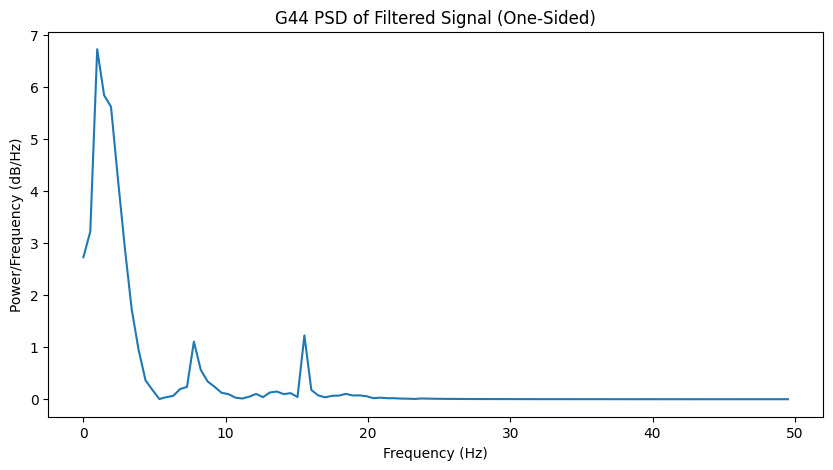

In [32]:
plt.figure(figsize=(10,5))
plt.plot(time, G44_filtered_signal)
plt.title('G44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G44_rectified_signal)
plt.title('G44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G44_freq, G44_fft_amp)
plt.title('G44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G44_freq_psd, G44_psd_one_sided)
plt.title('G44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

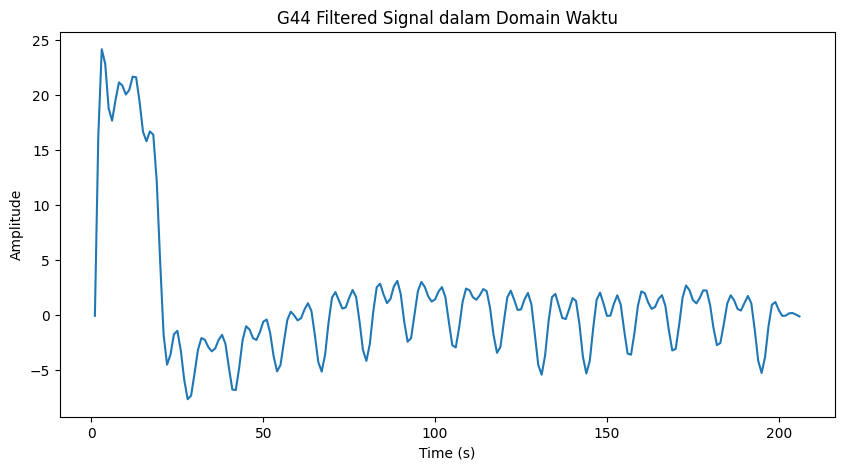

In [33]:
plt.figure(figsize=(10,5))
plt.plot(time, G44_filtered_signal)
plt.title('G44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

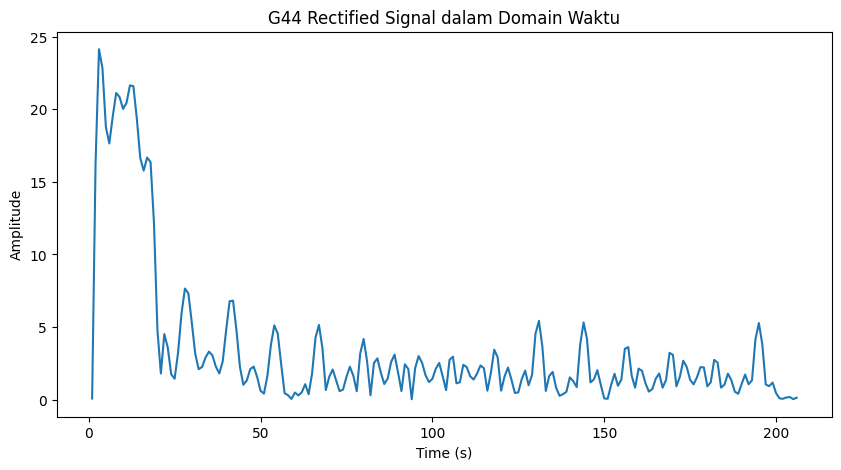

In [34]:
plt.figure(figsize=(10,5))
plt.plot(time, G44_rectified_signal)
plt.title('G44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

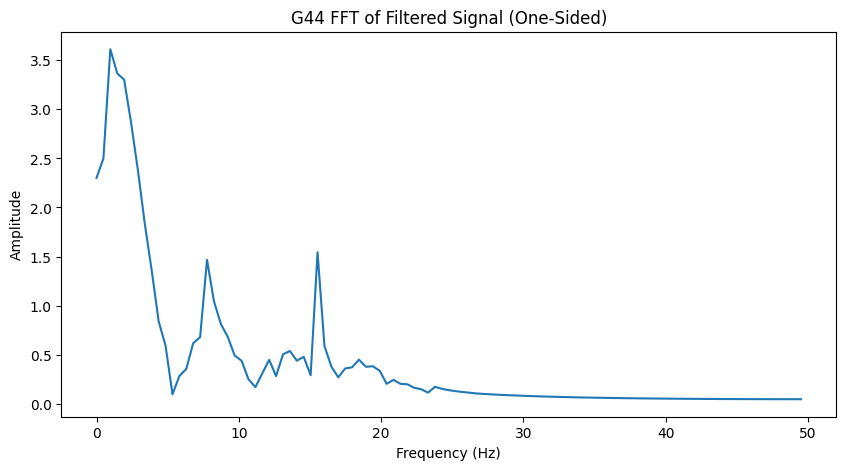

In [35]:
plt.figure(figsize=(10,5))
plt.plot(G44_freq, G44_fft_amp)
plt.title('G44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

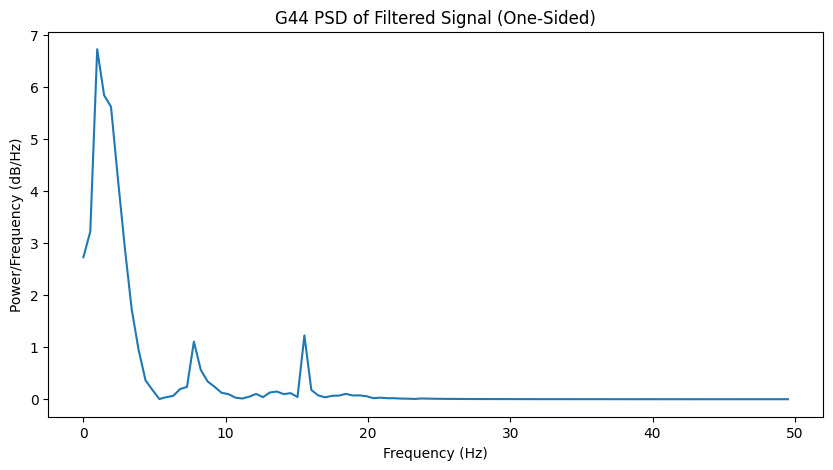

In [36]:
plt.figure(figsize=(10,5))
plt.plot(G44_freq_psd, G44_psd_one_sided)
plt.title('G44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

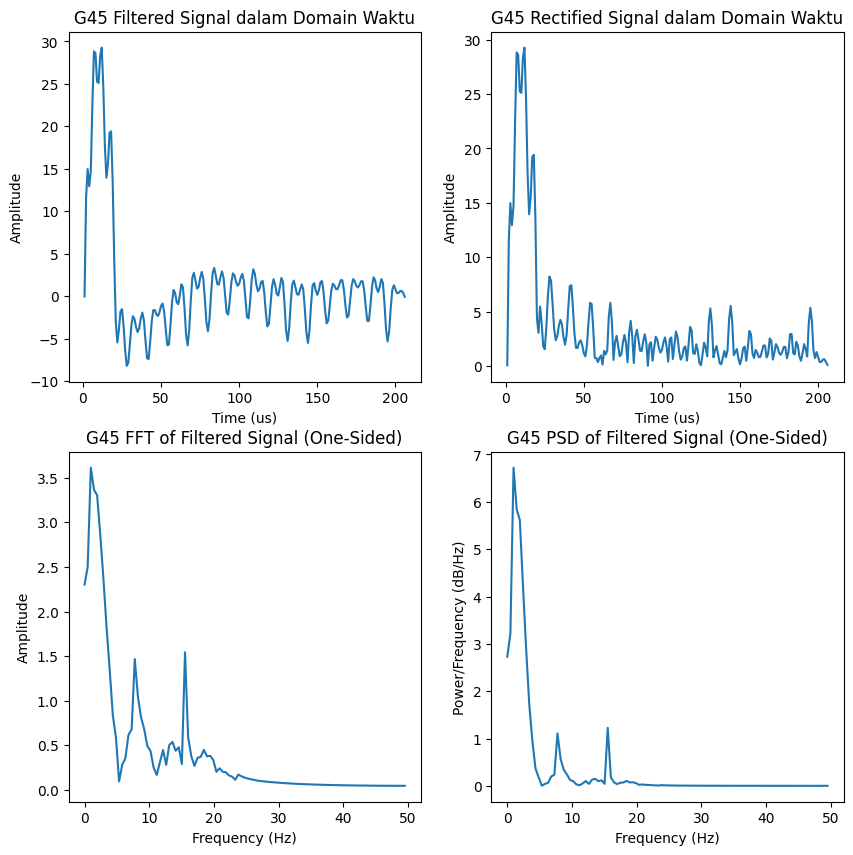

In [37]:
# G45
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G45_filtered_signal)
axs[0, 0].set_title('G45 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G45_rectified_signal)
axs[0, 1].set_title('G45 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G45_freq, G45_fft_amp)
axs[1, 0].set_title('G45 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G45_freq_psd, G45_psd_one_sided)
axs[1, 1].set_title('G45 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_4cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

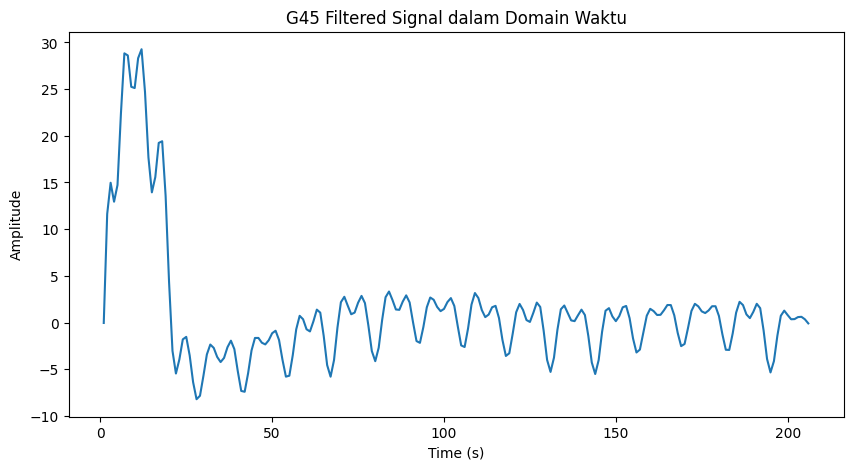

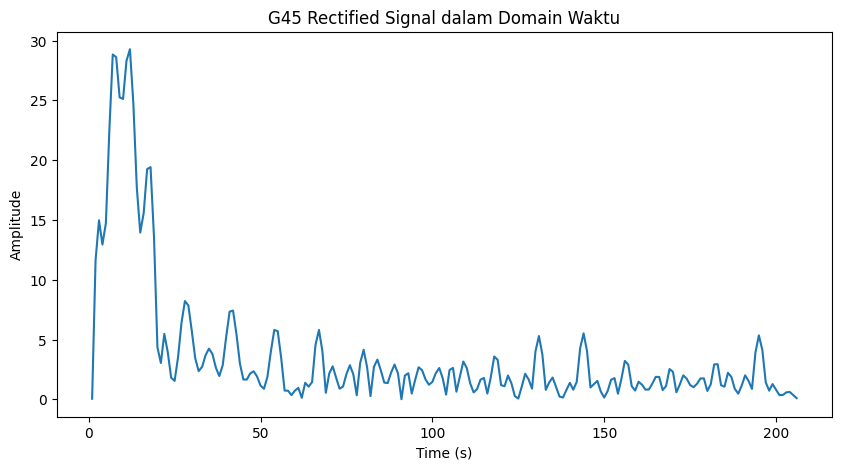

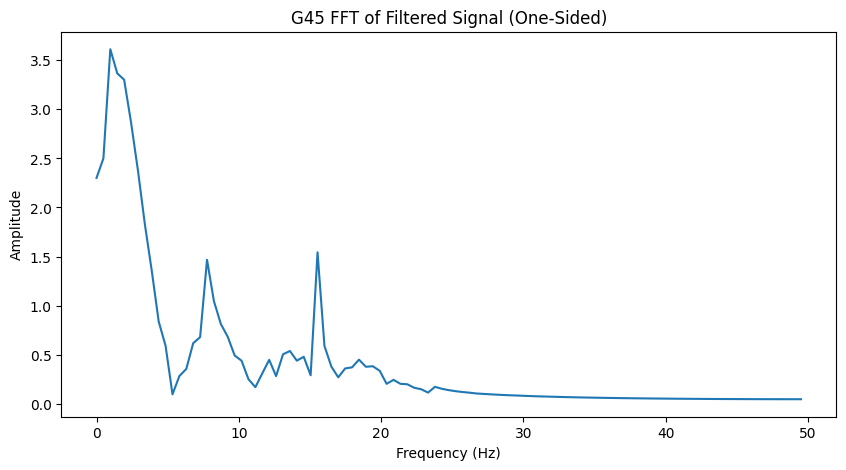

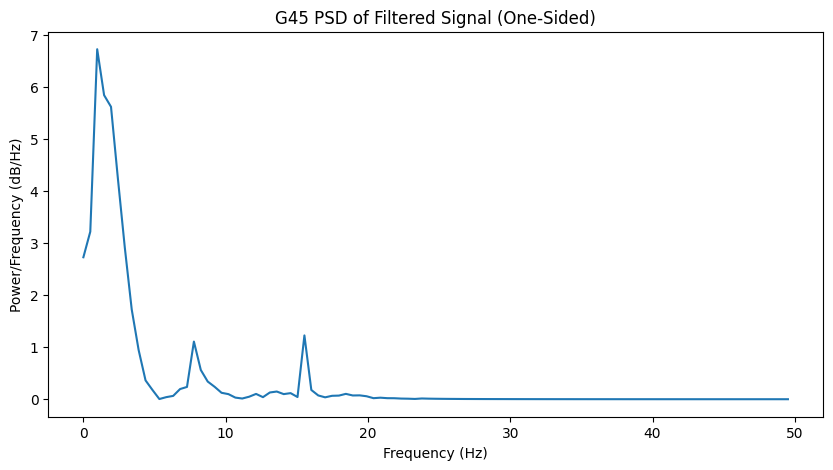

In [38]:
plt.figure(figsize=(10,5))
plt.plot(time, G45_filtered_signal)
plt.title('G45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G45_rectified_signal)
plt.title('G45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G45_freq, G45_fft_amp)
plt.title('G45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G45_freq_psd, G45_psd_one_sided)
plt.title('G45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

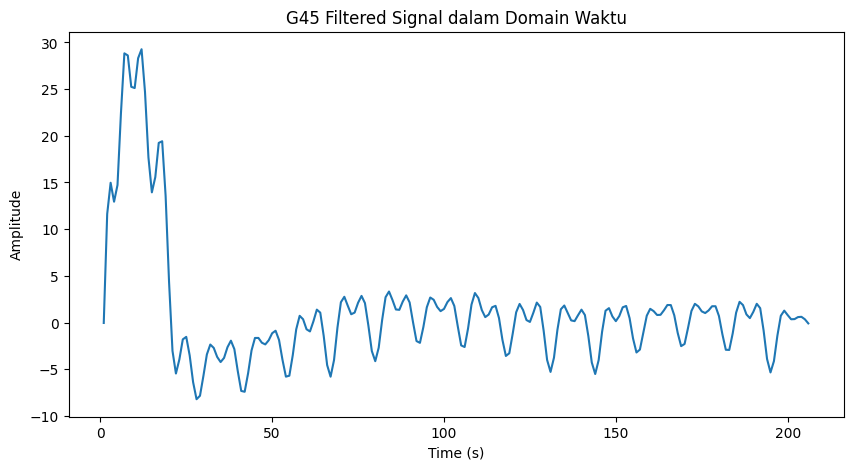

In [39]:
plt.figure(figsize=(10,5))
plt.plot(time, G45_filtered_signal)
plt.title('G45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

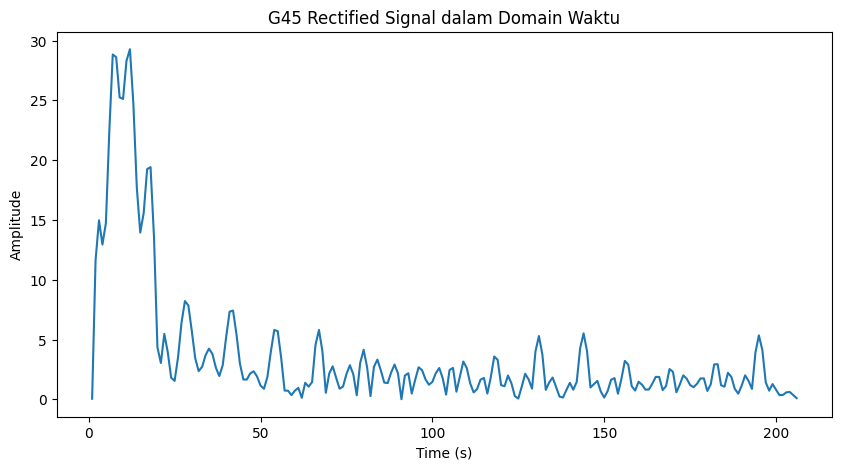

In [40]:
plt.figure(figsize=(10,5))
plt.plot(time, G45_rectified_signal)
plt.title('G45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

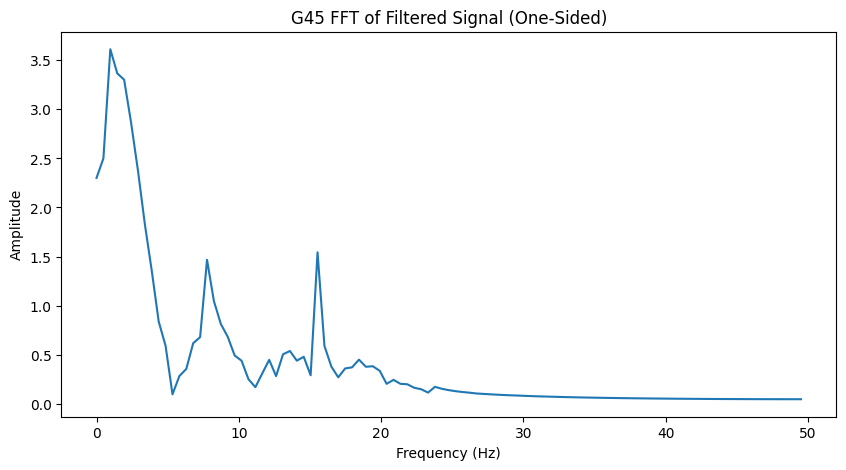

In [41]:
plt.figure(figsize=(10,5))
plt.plot(G45_freq, G45_fft_amp)
plt.title('G45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

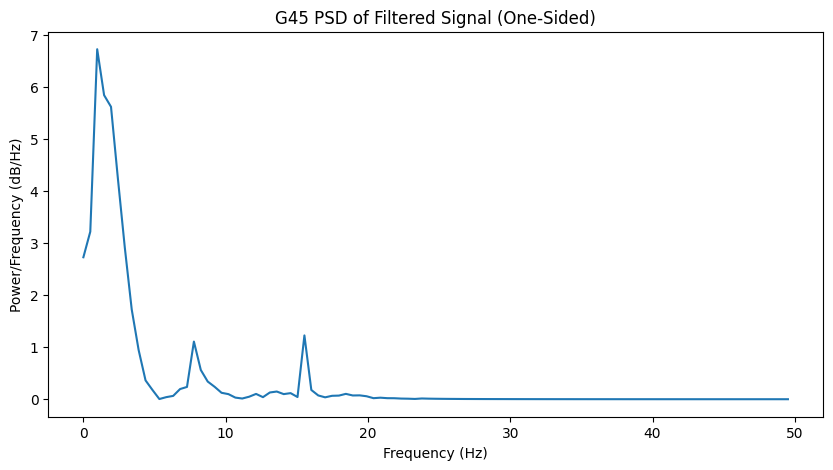

In [42]:
plt.figure(figsize=(10,5))
plt.plot(G45_freq_psd, G45_psd_one_sided)
plt.title('G45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

# Green 80% Jarak 3 cm


## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 3 cm

In [43]:
# G31 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G31_filtered_signal = signal.filtfilt(b, a, G31_signal_data)

# Rectify the signal (take only the positive values)
G31_rectified_signal = np.abs(G31_filtered_signal)

In [44]:
# G32 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G32_filtered_signal = signal.filtfilt(b, a, G32_signal_data)

# Rectify the signal (take only the positive values)
G32_rectified_signal = np.abs(G32_filtered_signal)

In [45]:
# G33 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G33_filtered_signal = signal.filtfilt(b, a, G33_signal_data)

# Rectify the signal (take only the positive values)
G33_rectified_signal = np.abs(G33_filtered_signal)

In [46]:
# G34 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G34_filtered_signal = signal.filtfilt(b, a, G34_signal_data)

# Rectify the signal (take only the positive values)
G34_rectified_signal = np.abs(G34_filtered_signal)

In [47]:
# G35 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
G35_filtered_signal = signal.filtfilt(b, a, G35_signal_data)

# Rectify the signal (take only the positive values)
G35_rectified_signal = np.abs(G35_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [48]:
# G31
# Perform Fourier Transform
G31_signal_fft = np.fft.fft(G31_filtered_signal)
G31_signal_freq = np.fft.fftfreq(len(G31_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G31_n = len(G31_filtered_signal)
G31_freq = G31_signal_freq[0:int(G31_n/2)]
G31_fft_amp = np.abs(G31_signal_fft)[0:int(G31_n/2)]/G31_n*2

# Perform power spectral density (PSD) calculation
G31_psd = (1/(fs*G31_n)) * np.square(np.abs(G31_signal_fft[:G31_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G31_freq_psd = G31_signal_freq[0:int(G31_n/2)]
G31_psd_one_sided = G31_psd[0:int(G31_n/2)]

In [49]:
# G32
# Perform Fourier Transform
G32_signal_fft = np.fft.fft(G32_filtered_signal)
G32_signal_freq = np.fft.fftfreq(len(G32_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G32_n = len(G32_filtered_signal)
G32_freq = G32_signal_freq[0:int(G32_n/2)]
G32_fft_amp = np.abs(G32_signal_fft)[0:int(G32_n/2)]/G32_n*2

# Perform power spectral density (PSD) calculation
G32_psd = (1/(fs*G32_n)) * np.square(np.abs(G32_signal_fft[:G32_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G32_freq_psd = G32_signal_freq[0:int(G32_n/2)]
G32_psd_one_sided = G32_psd[0:int(G32_n/2)]

In [50]:
# G33
# Perform Fourier Transform
G33_signal_fft = np.fft.fft(G33_filtered_signal)
G33_signal_freq = np.fft.fftfreq(len(G33_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G33_n = len(G33_filtered_signal)
G33_freq = G33_signal_freq[0:int(G33_n/2)]
G33_fft_amp = np.abs(G33_signal_fft)[0:int(G33_n/2)]/G33_n*2

# Perform power spectral density (PSD) calculation
G33_psd = (1/(fs*G33_n)) * np.square(np.abs(G33_signal_fft[:G33_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G33_freq_psd = G33_signal_freq[0:int(G33_n/2)]
G33_psd_one_sided = G33_psd[0:int(G33_n/2)]

In [51]:
# G34
# Perform Fourier Transform
G34_signal_fft = np.fft.fft(G34_filtered_signal)
G34_signal_freq = np.fft.fftfreq(len(G34_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G34_n = len(G34_filtered_signal)
G34_freq = G34_signal_freq[0:int(G34_n/2)]
G34_fft_amp = np.abs(G34_signal_fft)[0:int(G34_n/2)]/G34_n*2

# Perform power spectral density (PSD) calculation
G34_psd = (1/(fs*G34_n)) * np.square(np.abs(G34_signal_fft[:G34_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G34_freq_psd = G34_signal_freq[0:int(G34_n/2)]
G34_psd_one_sided = G34_psd[0:int(G34_n/2)]

In [52]:
# G35
# Perform Fourier Transform
G35_signal_fft = np.fft.fft(G35_filtered_signal)
G35_signal_freq = np.fft.fftfreq(len(G35_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
G35_n = len(G35_filtered_signal)
G35_freq = G35_signal_freq[0:int(G35_n/2)]
G35_fft_amp = np.abs(G35_signal_fft)[0:int(G35_n/2)]/G35_n*2

# Perform power spectral density (PSD) calculation
G35_psd = (1/(fs*G35_n)) * np.square(np.abs(G35_signal_fft[:G35_n//2]))

# Perform one-sided PSD (discard negative frequencies)
G35_freq_psd = G35_signal_freq[0:int(G35_n/2)]
G35_psd_one_sided = G35_psd[0:int(G35_n/2)]

# Plot

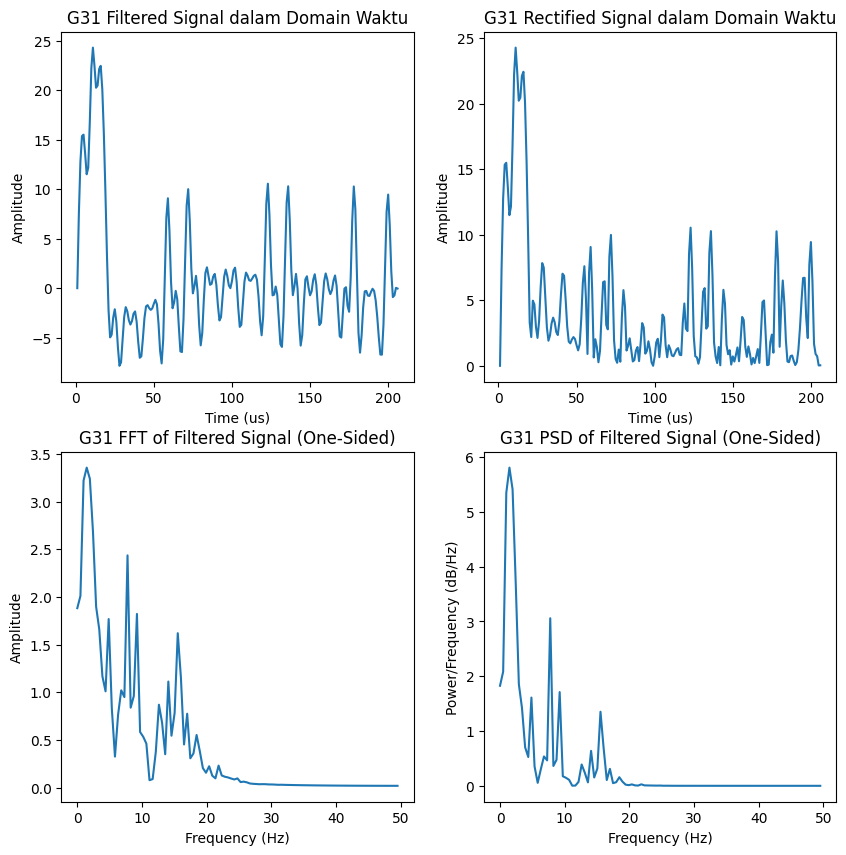

In [53]:
# G31
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G31_filtered_signal)
axs[0, 0].set_title('G31 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G31_rectified_signal)
axs[0, 1].set_title('G31 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')


axs[1, 0].plot(G31_freq, G31_fft_amp)
axs[1, 0].set_title('G31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G31_freq_psd, G31_psd_one_sided)
axs[1, 1].set_title('G31 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_3cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

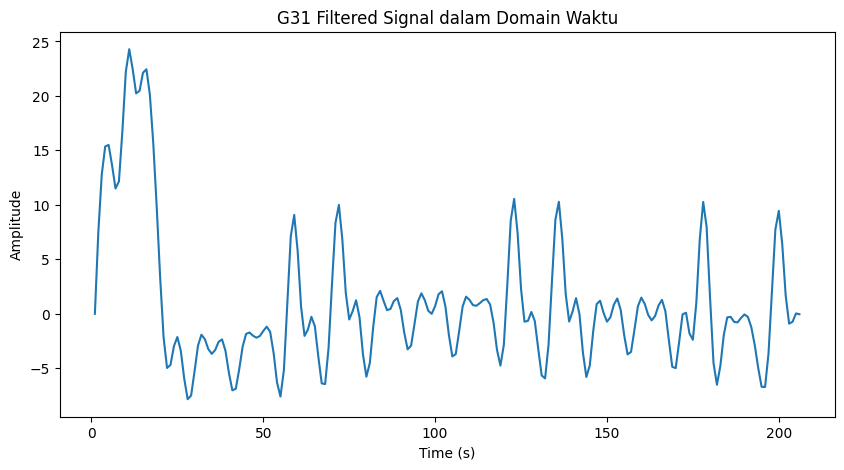

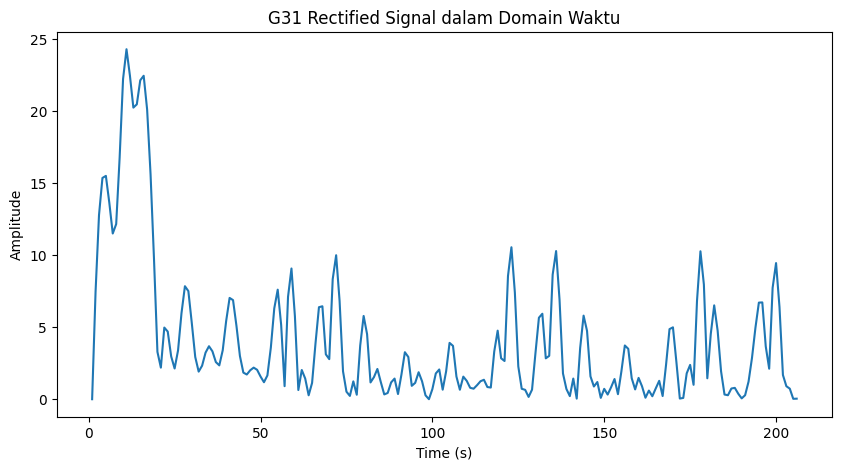

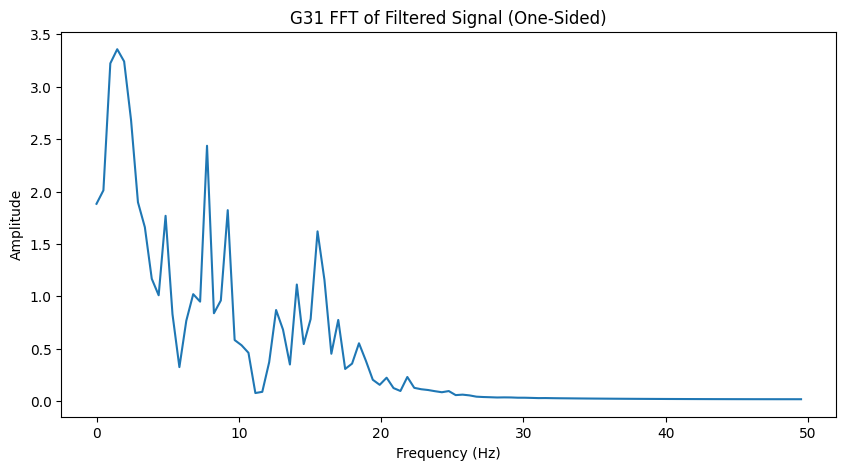

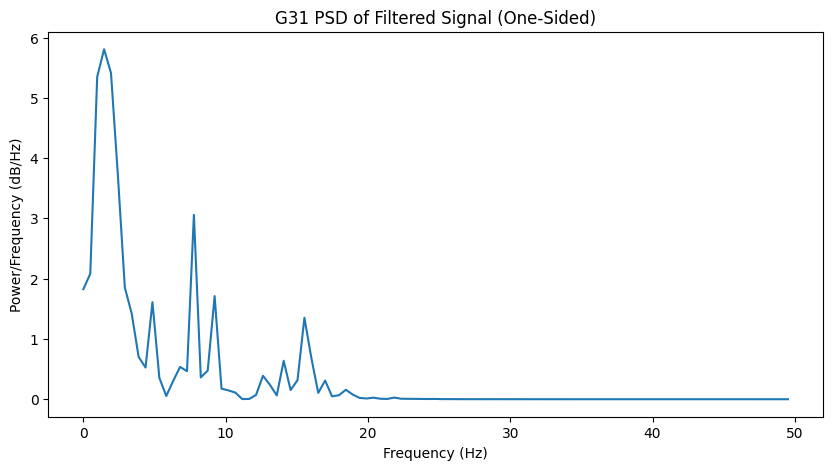

In [54]:
plt.figure(figsize=(10,5))
plt.plot(time, G31_filtered_signal)
plt.title('G31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G31_rectified_signal)
plt.title('G31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G31_freq, G31_fft_amp)
plt.title('G31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G31_freq_psd, G31_psd_one_sided)
plt.title('G31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

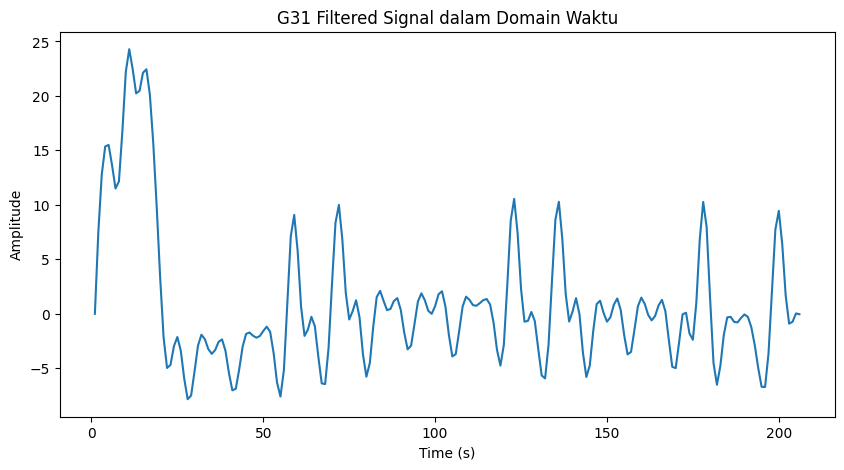

In [55]:
plt.figure(figsize=(10,5))
plt.plot(time, G31_filtered_signal)
plt.title('G31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

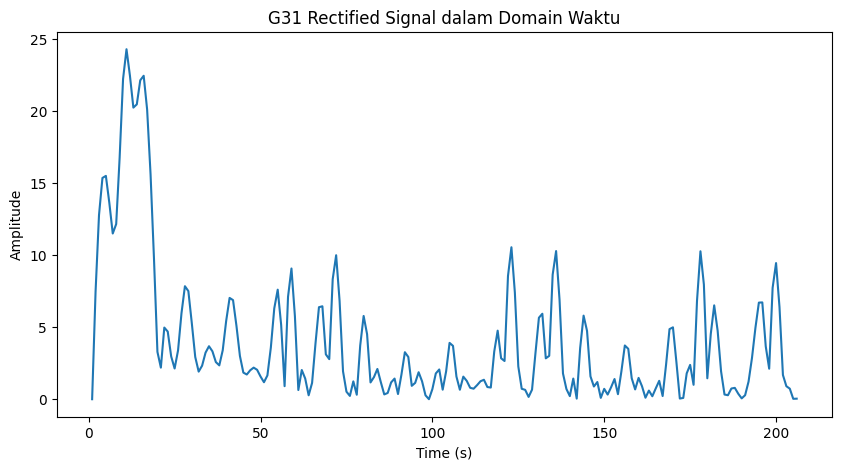

In [56]:
plt.figure(figsize=(10,5))
plt.plot(time, G31_rectified_signal)
plt.title('G31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

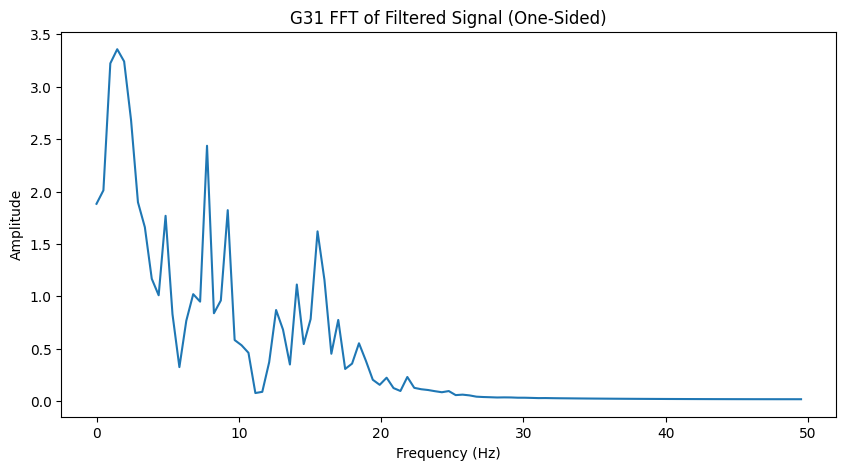

In [57]:
plt.figure(figsize=(10,5))
plt.plot(G31_freq, G31_fft_amp)
plt.title('G31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

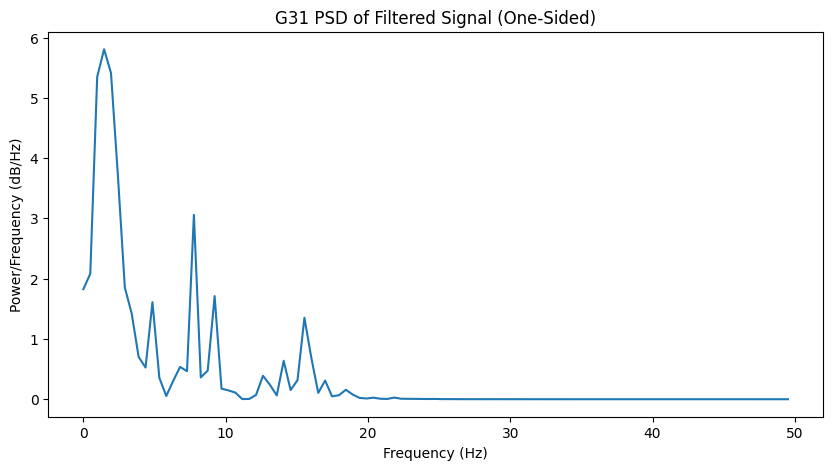

In [58]:
plt.figure(figsize=(10,5))
plt.plot(G31_freq_psd, G31_psd_one_sided)
plt.title('G31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

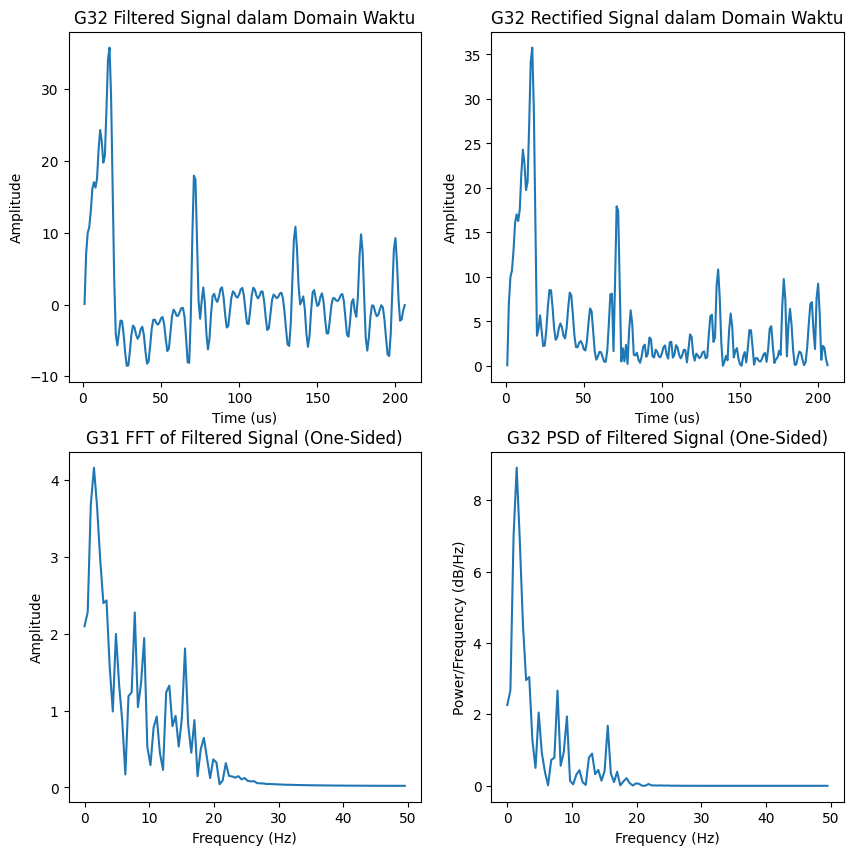

In [59]:
# G32
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G32_filtered_signal)
axs[0, 0].set_title('G32 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G32_rectified_signal)
axs[0, 1].set_title('G32 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G32_freq, G32_fft_amp)
axs[1, 0].set_title('G31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G32_freq_psd, G32_psd_one_sided)
axs[1, 1].set_title('G32 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_3cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

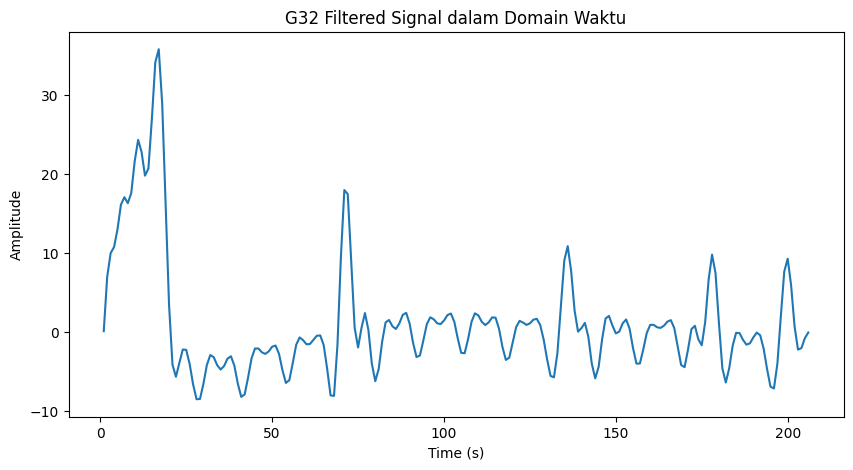

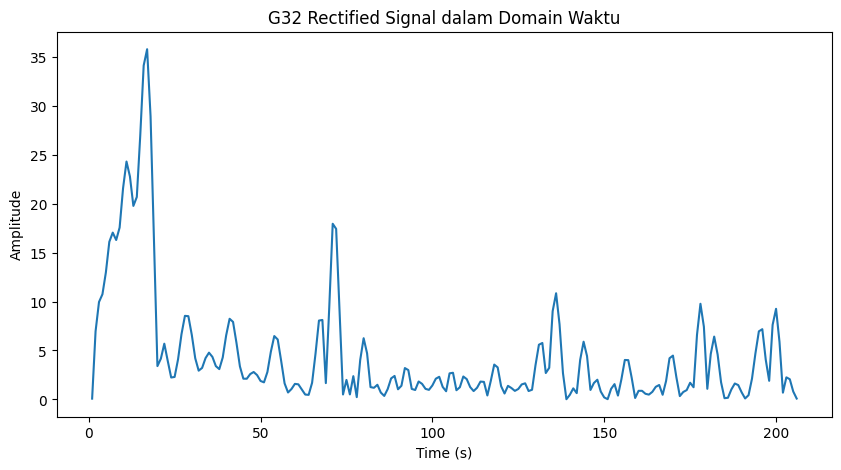

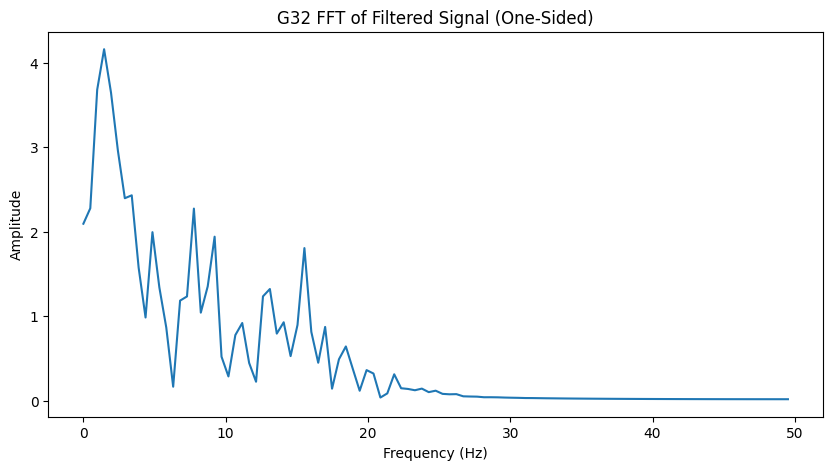

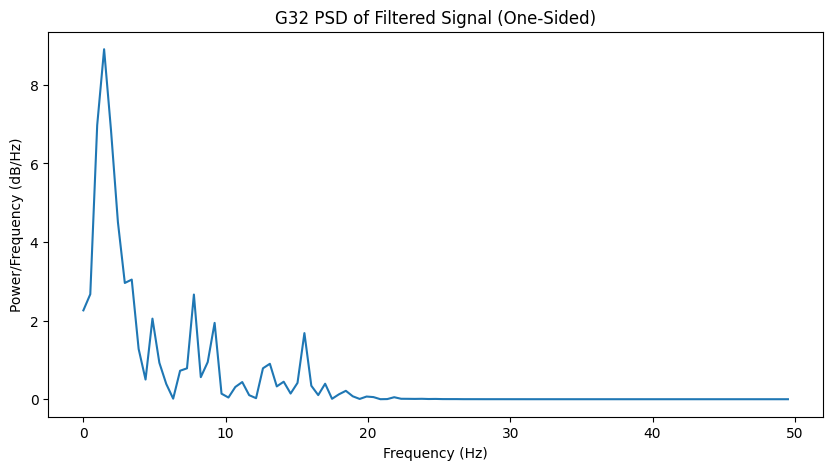

In [60]:
plt.figure(figsize=(10,5))
plt.plot(time, G32_filtered_signal)
plt.title('G32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G32_rectified_signal)
plt.title('G32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G32_freq, G32_fft_amp)
plt.title('G32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G32_freq_psd, G32_psd_one_sided)
plt.title('G32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

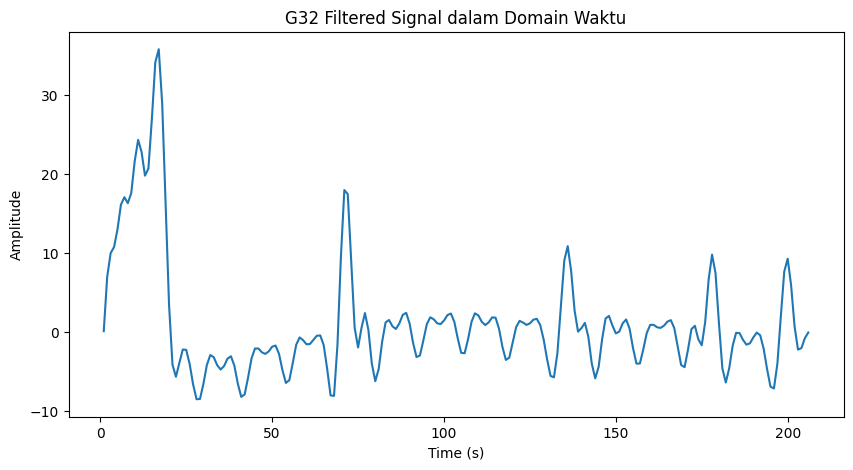

In [61]:
plt.figure(figsize=(10,5))
plt.plot(time, G32_filtered_signal)
plt.title('G32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

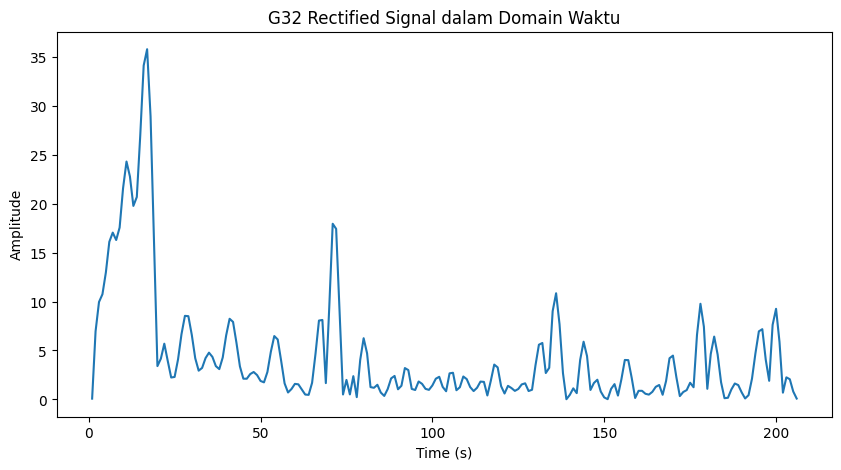

In [62]:
plt.figure(figsize=(10,5))
plt.plot(time, G32_rectified_signal)
plt.title('G32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

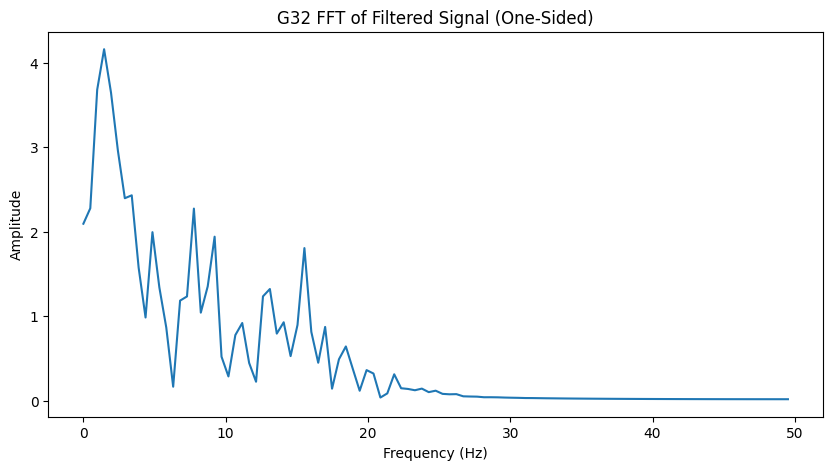

In [63]:
plt.figure(figsize=(10,5))
plt.plot(G32_freq, G32_fft_amp)
plt.title('G32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

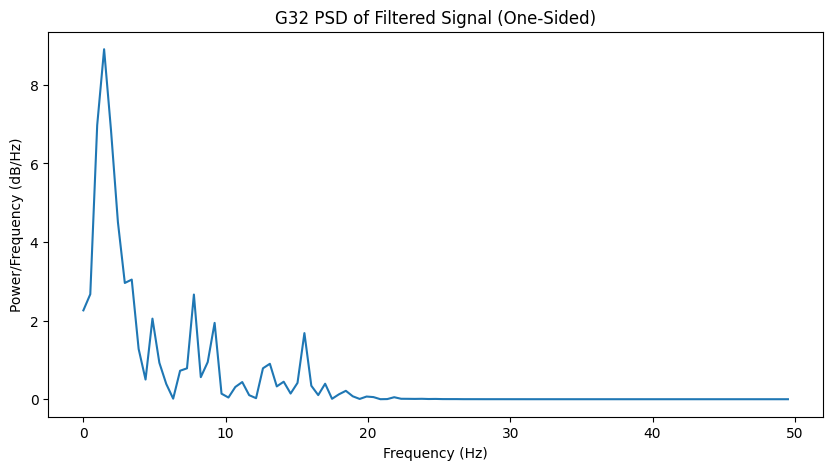

In [64]:
plt.figure(figsize=(10,5))
plt.plot(G32_freq_psd, G32_psd_one_sided)
plt.title('G32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

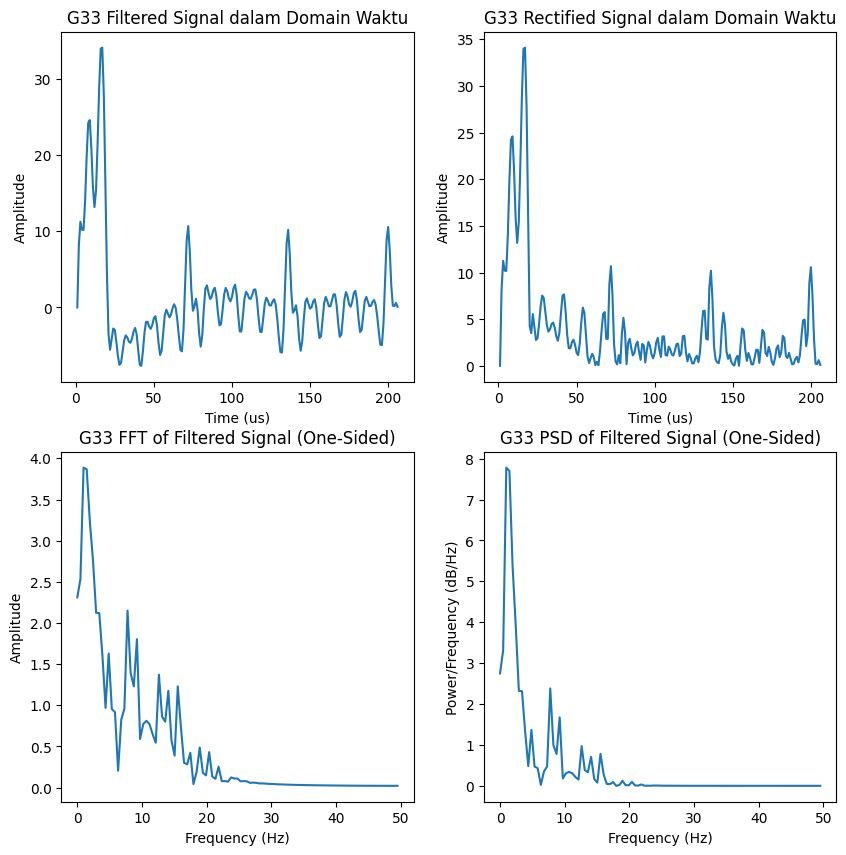

In [65]:
# G33
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G33_filtered_signal)
axs[0, 0].set_title('G33 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G33_rectified_signal)
axs[0, 1].set_title('G33 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G33_freq, G33_fft_amp)
axs[1, 0].set_title('G33 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G33_freq_psd, G33_psd_one_sided)
axs[1, 1].set_title('G33 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_3cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

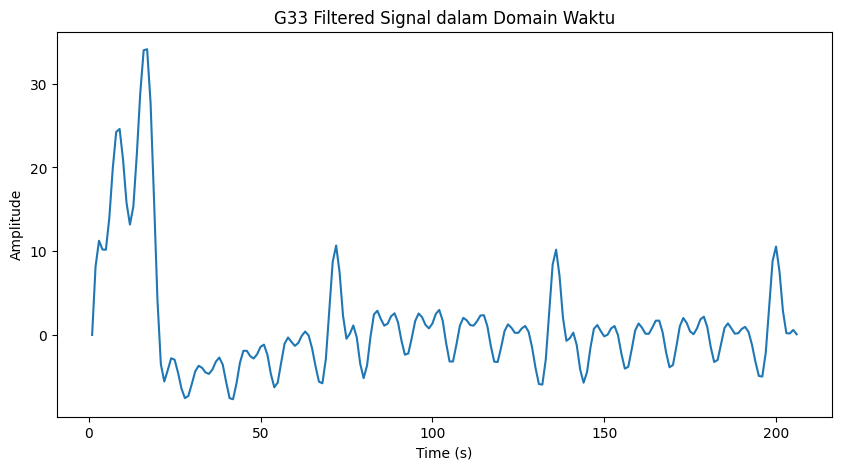

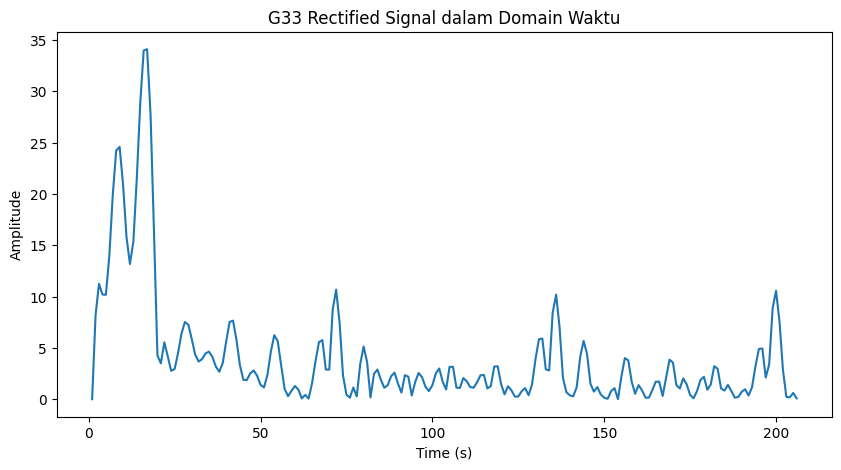

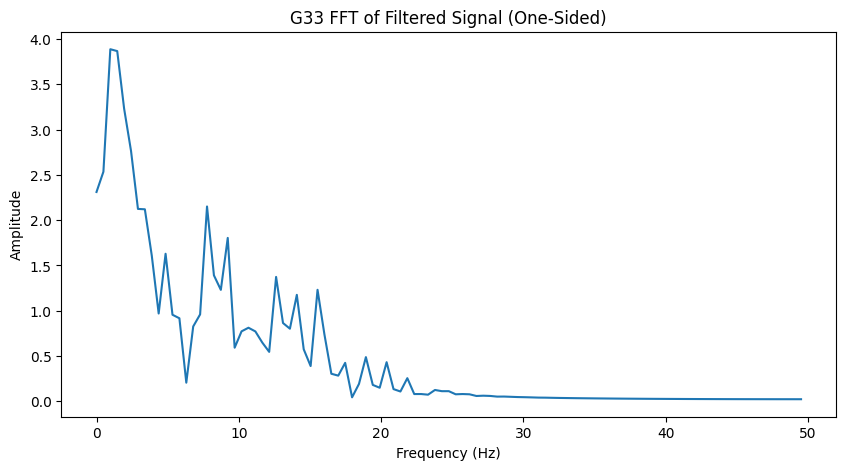

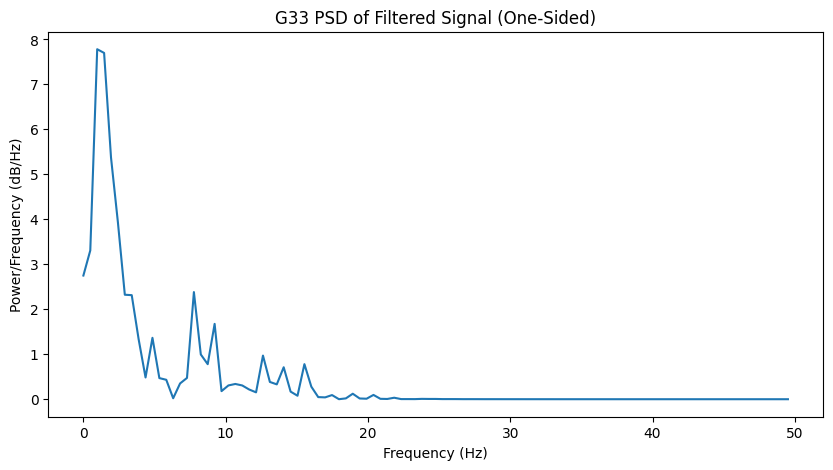

In [66]:
plt.figure(figsize=(10,5))
plt.plot(time, G33_filtered_signal)
plt.title('G33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G33_rectified_signal)
plt.title('G33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G33_freq, G33_fft_amp)
plt.title('G33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G33_freq_psd, G33_psd_one_sided)
plt.title('G33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

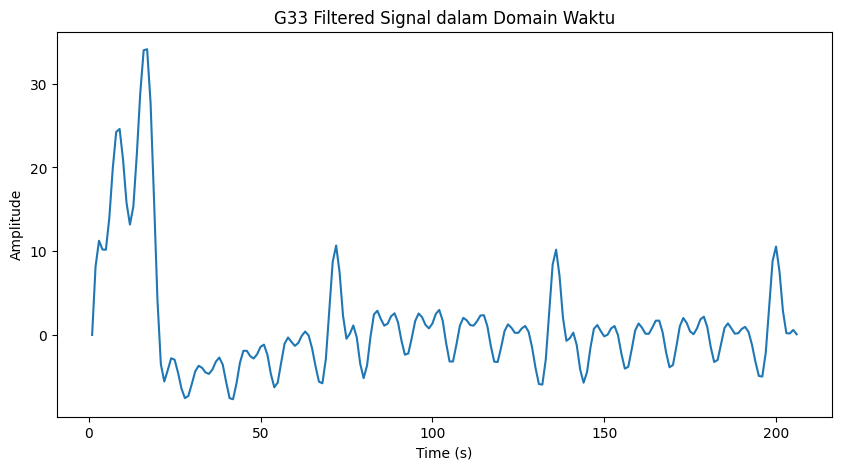

In [67]:
plt.figure(figsize=(10,5))
plt.plot(time, G33_filtered_signal)
plt.title('G33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

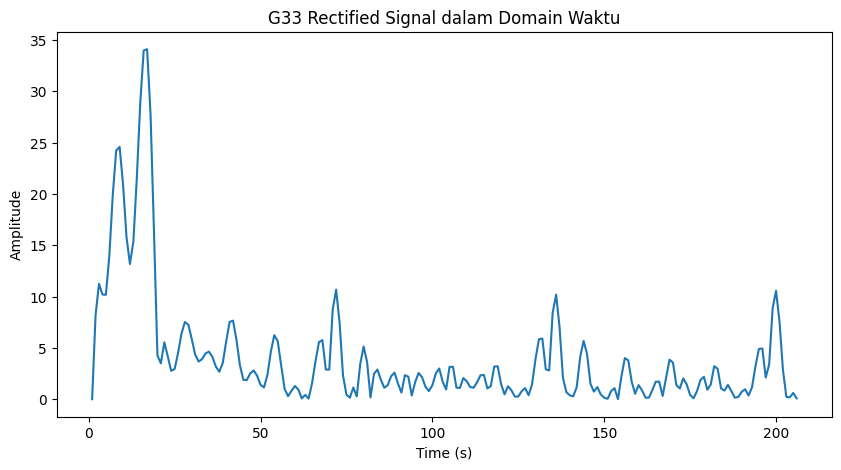

In [68]:
plt.figure(figsize=(10,5))
plt.plot(time, G33_rectified_signal)
plt.title('G33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

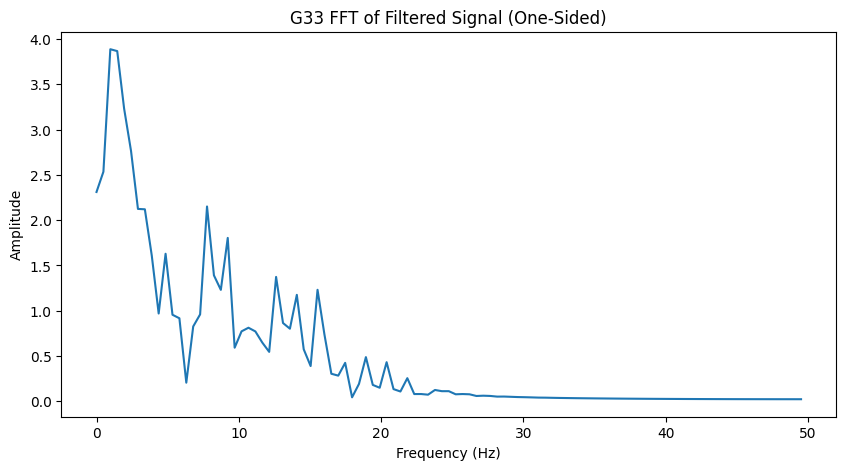

In [69]:
plt.figure(figsize=(10,5))
plt.plot(G33_freq, G33_fft_amp)
plt.title('G33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

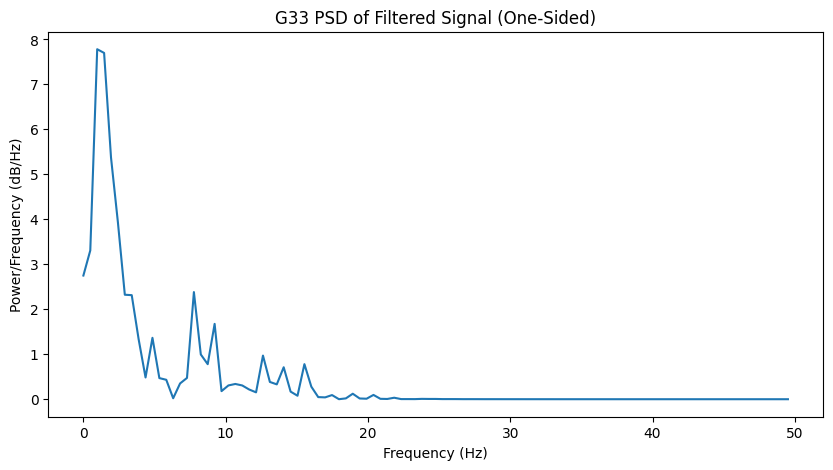

In [70]:
plt.figure(figsize=(10,5))
plt.plot(G33_freq_psd, G33_psd_one_sided)
plt.title('G33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

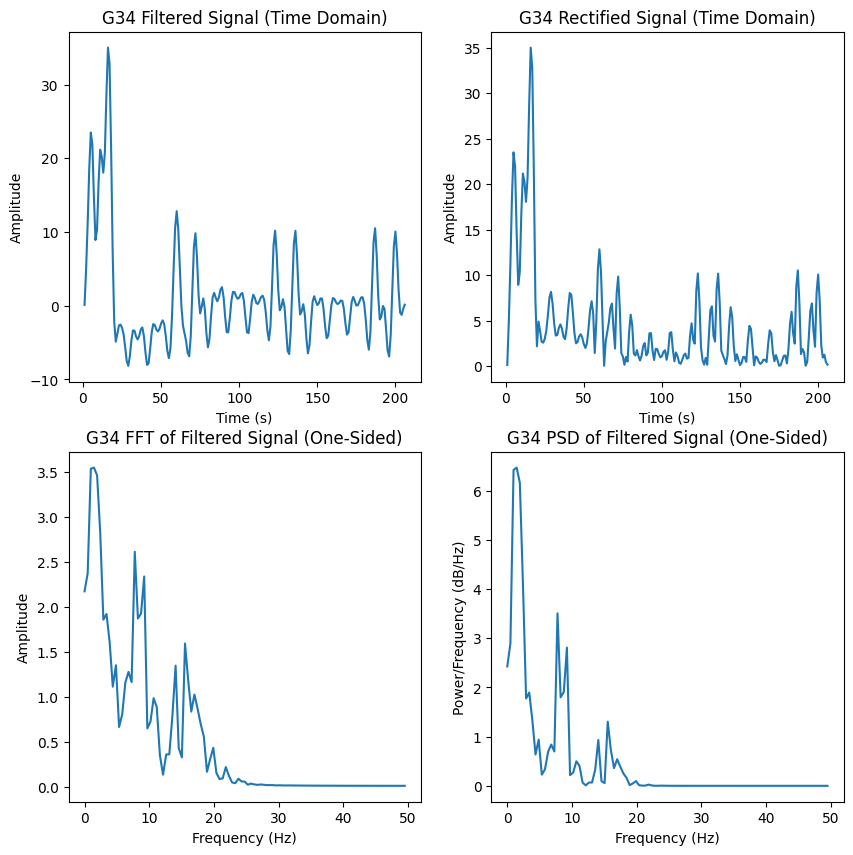

In [71]:
# G34
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G34_filtered_signal)
axs[0, 0].set_title('G34 Filtered Signal (Time Domain)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G34_rectified_signal)
axs[0, 1].set_title('G34 Rectified Signal (Time Domain)')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G34_freq, G34_fft_amp)
axs[1, 0].set_title('G34 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G34_freq_psd, G34_psd_one_sided)
axs[1, 1].set_title('G34 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_3cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

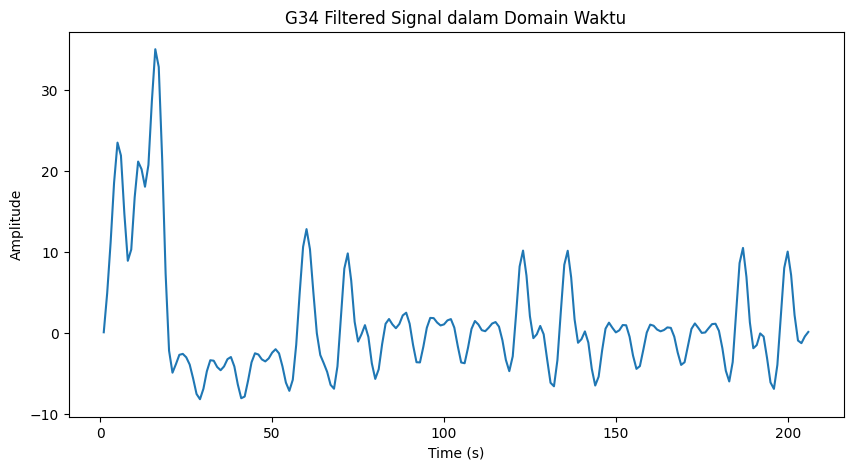

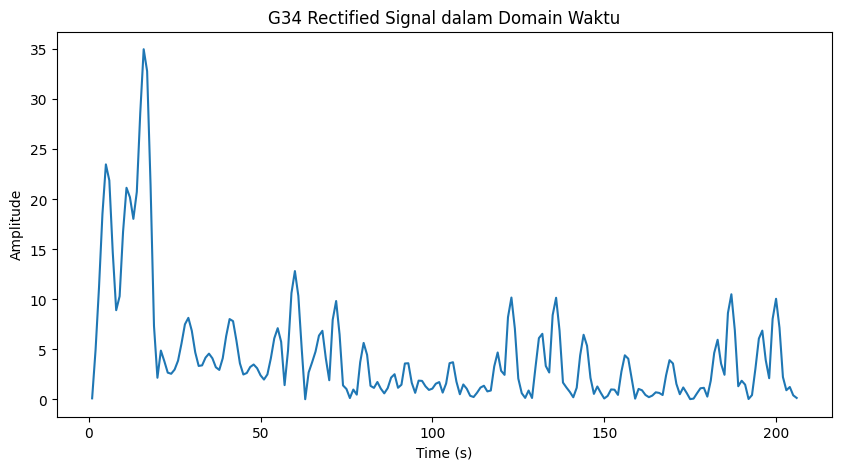

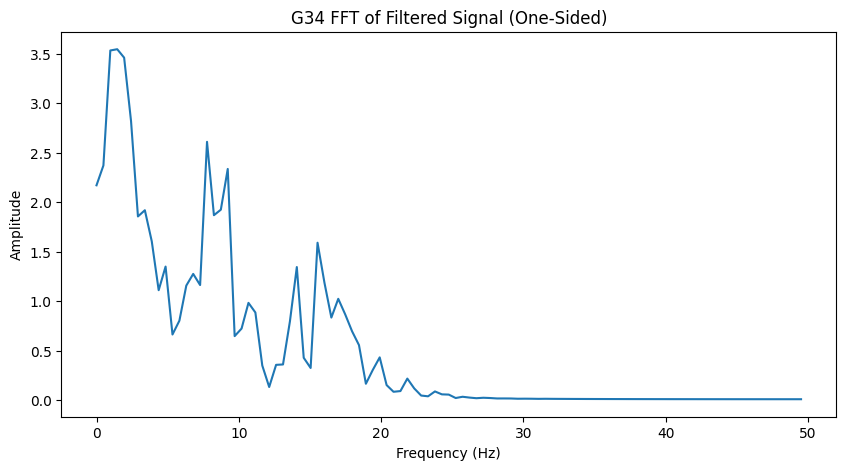

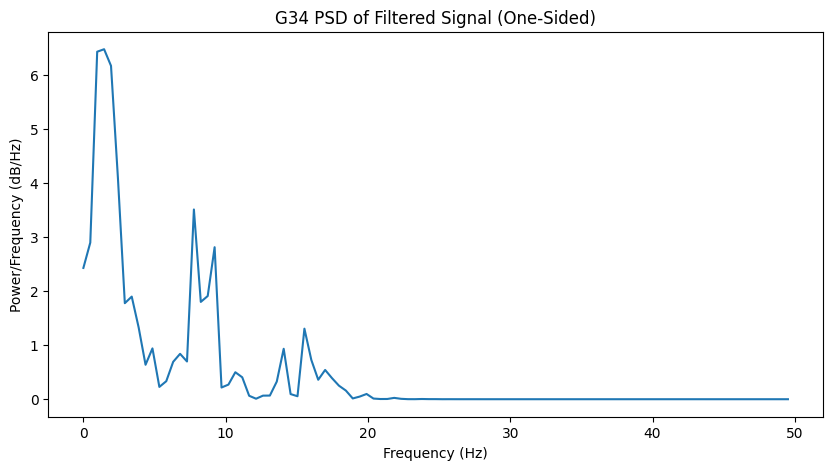

In [72]:
plt.figure(figsize=(10,5))
plt.plot(time, G34_filtered_signal)
plt.title('G34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G34_rectified_signal)
plt.title('G34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G34_freq, G34_fft_amp)
plt.title('G34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G34_freq_psd, G34_psd_one_sided)
plt.title('G34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

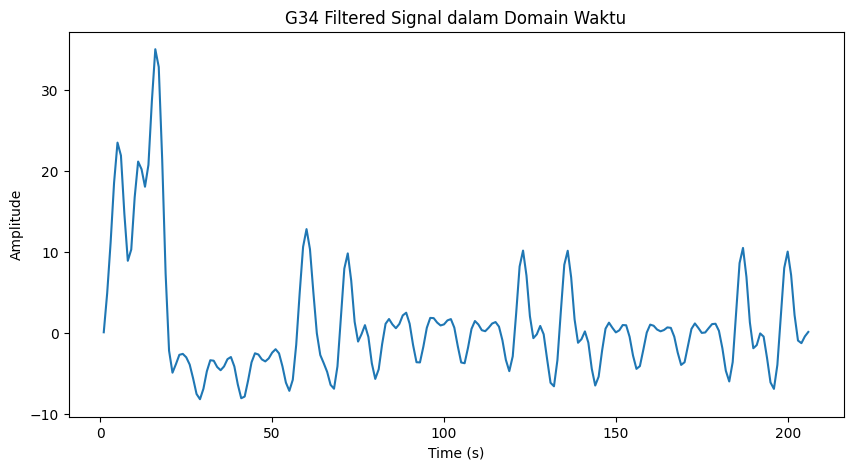

In [73]:
plt.figure(figsize=(10,5))
plt.plot(time, G34_filtered_signal)
plt.title('G34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

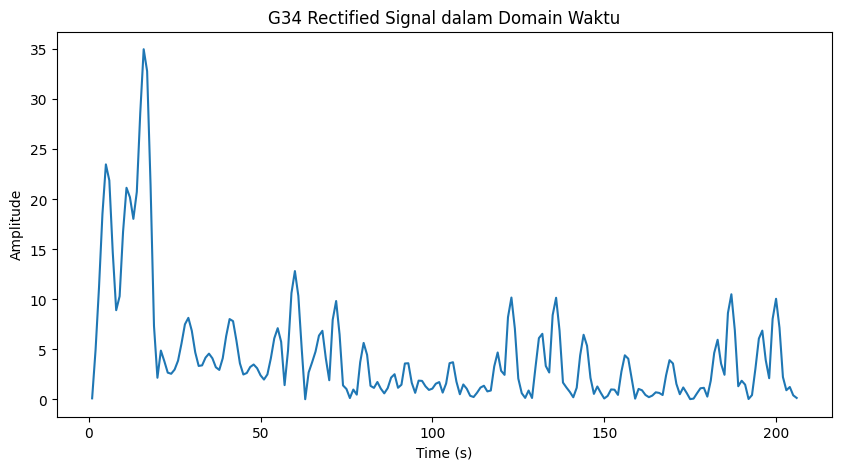

In [74]:
plt.figure(figsize=(10,5))
plt.plot(time, G34_rectified_signal)
plt.title('G34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

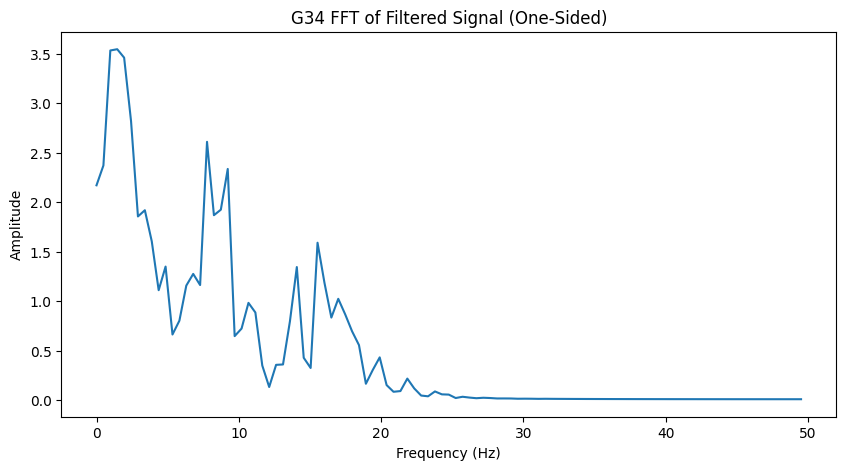

In [75]:
plt.figure(figsize=(10,5))
plt.plot(G34_freq, G34_fft_amp)
plt.title('G34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

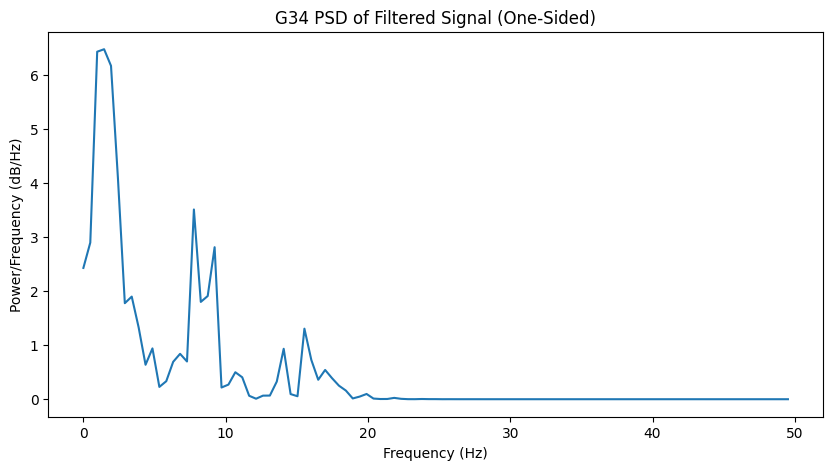

In [76]:
plt.figure(figsize=(10,5))
plt.plot(G34_freq_psd, G34_psd_one_sided)
plt.title('G34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

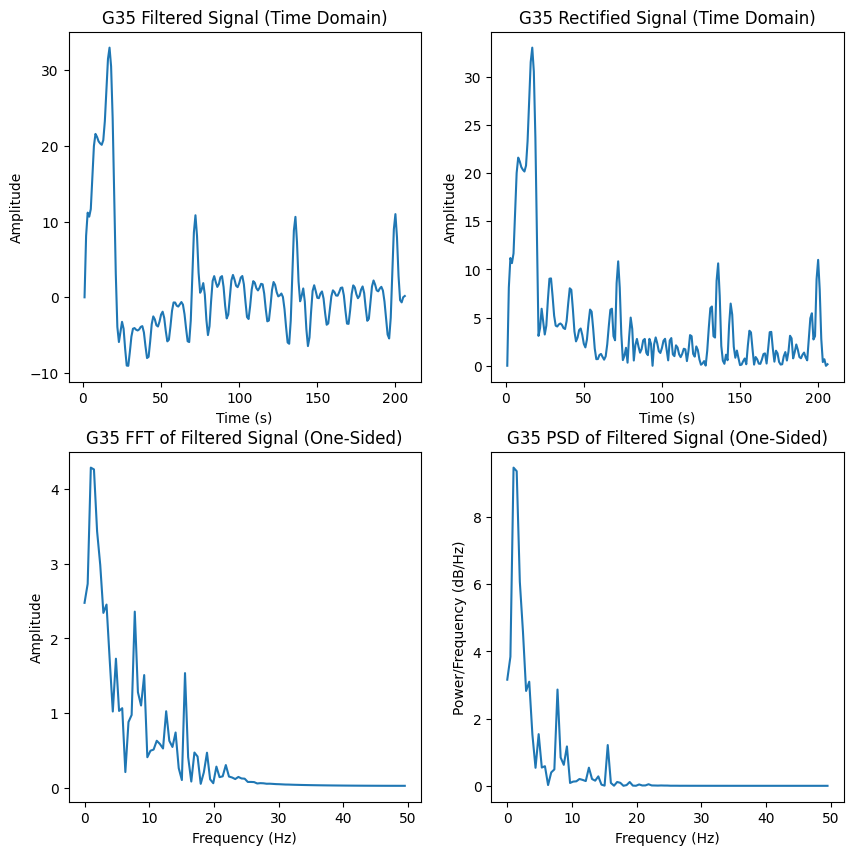

In [77]:
# G35
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, G35_filtered_signal)
axs[0, 0].set_title('G35 Filtered Signal (Time Domain)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, G35_rectified_signal)
axs[0, 1].set_title('G35 Rectified Signal (Time Domain)')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(G35_freq, G35_fft_amp)
axs[1, 0].set_title('G35 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(G35_freq_psd, G35_psd_one_sided)
axs[1, 1].set_title('G35 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Green_3cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

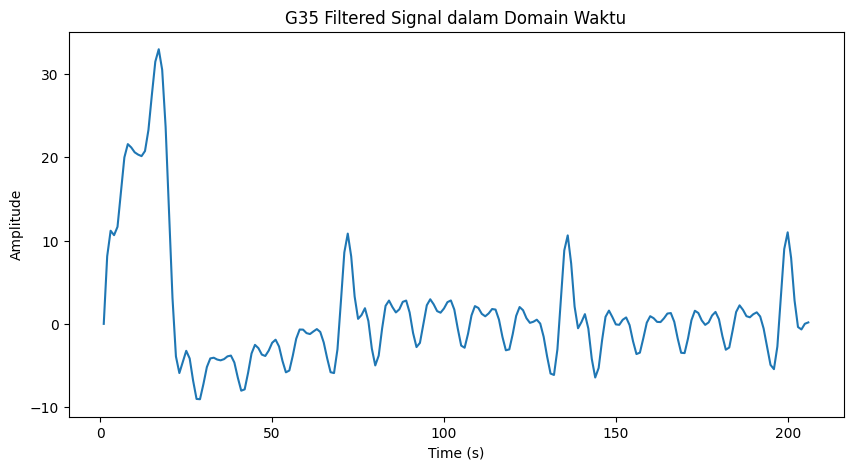

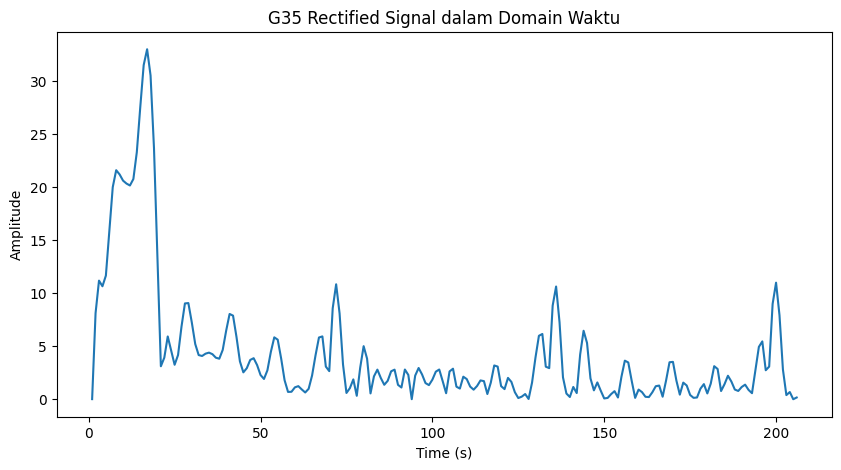

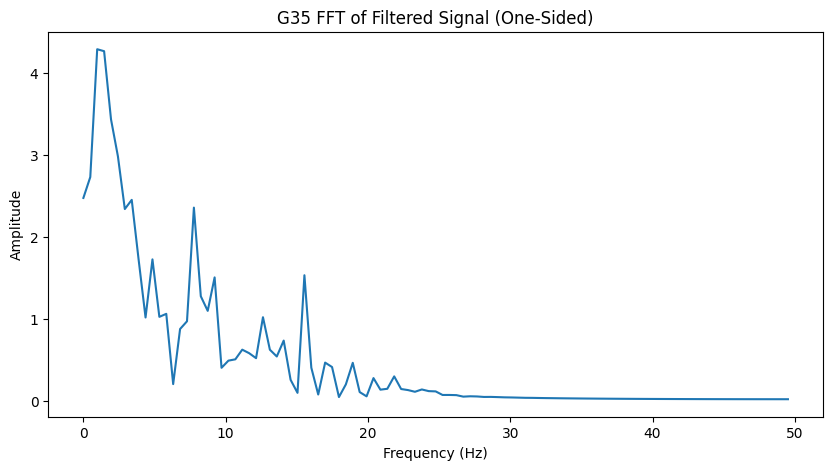

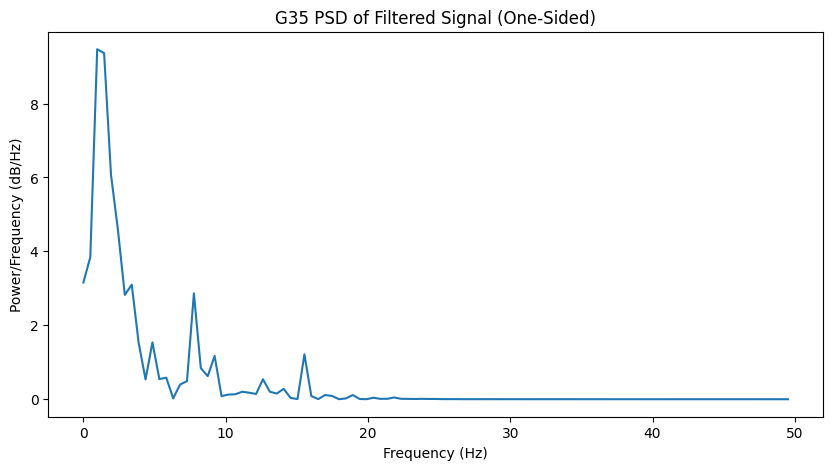

In [78]:
plt.figure(figsize=(10,5))
plt.plot(time, G35_filtered_signal)
plt.title('G35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, G35_rectified_signal)
plt.title('G35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G35_freq, G35_fft_amp)
plt.title('G35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(G35_freq_psd, G35_psd_one_sided)
plt.title('G35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

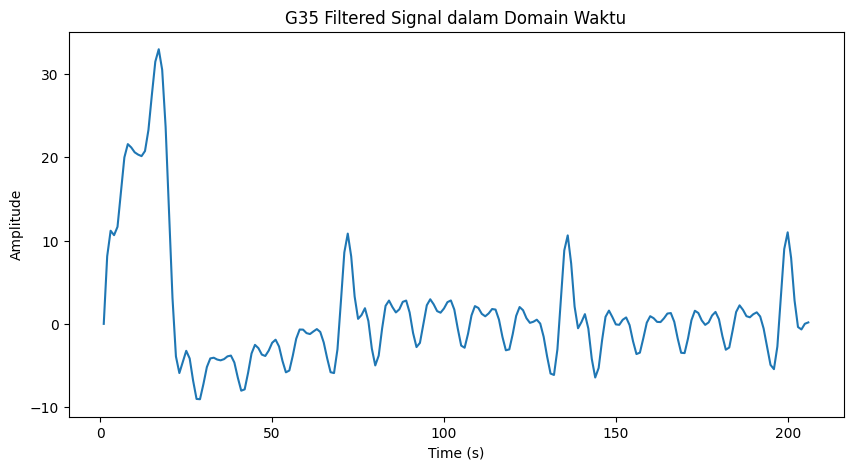

In [79]:
plt.figure(figsize=(10,5))
plt.plot(time, G35_filtered_signal)
plt.title('G35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

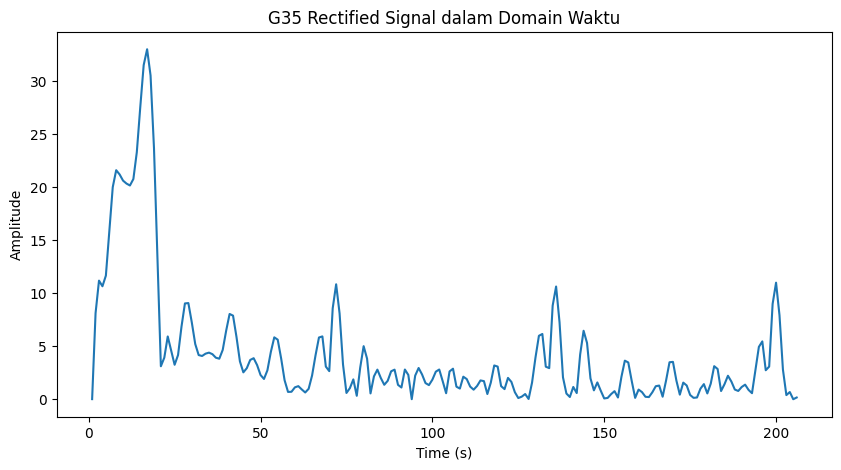

In [80]:
plt.figure(figsize=(10,5))
plt.plot(time, G35_rectified_signal)
plt.title('G35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

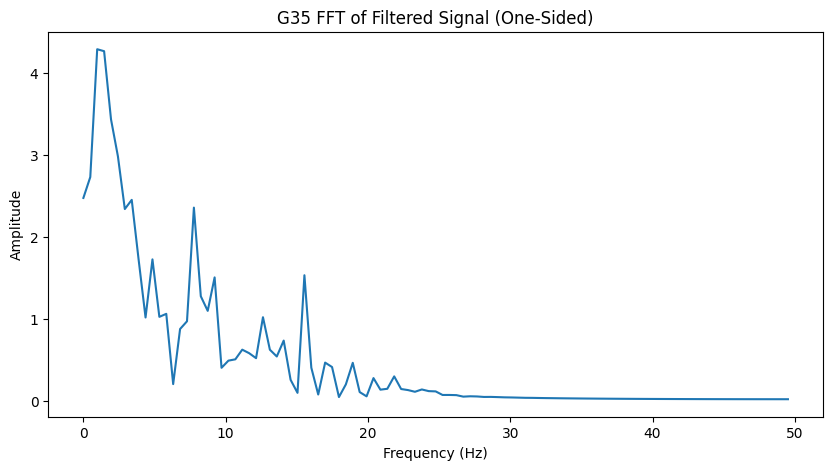

In [81]:
plt.figure(figsize=(10,5))
plt.plot(G35_freq, G35_fft_amp)
plt.title('G35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

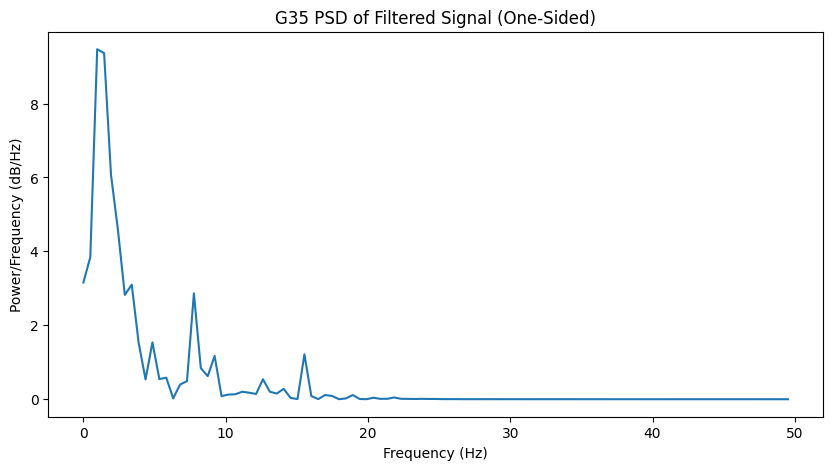

In [82]:
plt.figure(figsize=(10,5))
plt.plot(G35_freq_psd, G35_psd_one_sided)
plt.title('G35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show